In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [17]:
#basic RNN
import tensorflow as tf

n_inputs =3
n_neurons = 5

X0 =  tf.placeholder(tf.float32, [None, n_inputs])
X1 = tf.placeholder(tf.float32, [None, n_inputs])

Wx = tf.Variable(tf.random_normal(shape=[n_inputs, n_neurons], dtype=tf.float32))
Wy = tf.Variable(tf.random_normal(shape=[n_neurons, n_neurons], dtype=tf.float32))
b = tf.Variable(tf.zeros([1, n_neurons], dtype=tf.float32))

Y0 = tf.tanh(tf.matmul(X0, Wx) +b)
Y1 = tf.tanh(tf.matmul(Y0, Wy) + tf.matmul(X1, Wx) + b)

init = tf.global_variables_initializer()

In [18]:
import numpy as np

X0_batch = np.array([[0,1,2], [3,4,5], [6,7,8], [9,0,1]])
X1_batch = np.array([[9,8,7],[0,0,0],[6,5,4],[3,2,1]])

with tf.Session() as sess:
    init.run()
    Y0_val, Y1_val = sess.run([Y0, Y1], feed_dict={X0:X0_batch, X1:X1_batch})
    

In [19]:
print(Y0_val)

[[-0.5500747  -0.9977884  -0.87712187 -0.9836389  -0.9974953 ]
 [ 0.9919829  -0.9999989  -0.99764913 -0.99999964 -1.        ]
 [ 0.9999906  -1.         -0.9999577  -1.         -1.        ]
 [ 0.99999833  0.99999005 -0.99957514  0.99065834 -1.        ]]


In [20]:
print(Y1_val)

[[ 1.         -0.99998665 -0.9905306  -1.         -1.        ]
 [ 0.2309521   0.9947963   0.95415217  0.98085284 -0.7258208 ]
 [ 0.9999995  -0.8518489  -0.6516489  -0.99998623 -1.        ]
 [ 0.98976773  0.9550551   0.5644572  -0.9987908  -1.        ]]


## BasicRNNCell

In [21]:
tf.reset_default_graph()
# static unrolling through time

X0 = tf.placeholder(tf.float32, [None, n_inputs])
X1 = tf.placeholder(tf.float32, [None, n_inputs])
# we create input palceholders

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
#  we create BasicRNNCell which you can think of as a factory that creates copies of the cell to build the unrolled RNN

output_seqs,states = tf.contrib.rnn.static_rnn(
                     basic_cell, [X0, X1], dtype=tf.float32)
# we call static rnn which calls the BasicRNNCell creating two copies of cell


Y0, Y1 = output_seqs

W0621 10:41:16.033910 13776 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0621 10:41:26.045941 13776 deprecation.py:323] From <ipython-input-21-a901f2d44e3f>:8: BasicRNNCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.
W0621 10:41:26.053936 13776 deprecation.py:323] From <ipython-input-21-a901f2d44e3f>:12: static_rnn (from tensorflow.python.ops.rnn) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `keras.layers.RNN(ce

In [22]:
# if there wer 50 time steps, it wouldnot be ery convenient to have ot 
# define 50 input placeholders and 50 output tensors

print(Y0)
print(Y1)



Tensor("rnn/basic_rnn_cell/Tanh:0", shape=(?, 5), dtype=float32)
Tensor("rnn/basic_rnn_cell/Tanh_1:0", shape=(?, 5), dtype=float32)


In [23]:
# using the packing sequences
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    Y0_val, Y1_val = sess.run([Y0, Y1], feed_dict={X0:X0_batch, X1:X1_batch})

In [24]:
Y0_val

array([[ 0.63527167, -0.47118488, -0.45695874,  0.83850336, -0.3479963 ],
       [ 0.68181807, -0.9977538 ,  0.54922223,  0.91512644, -0.81321985],
       [ 0.7234289 , -0.99999297,  0.93881845,  0.9562601 , -0.9570657 ],
       [ 0.1885022 , -0.9999122 ,  0.999551  , -0.9997079 ,  0.9428742 ]],
      dtype=float32)

In [25]:
Y1_val

array([[ 0.08716378, -0.99999875,  0.99955934,  0.31829447, -0.9751011 ],
       [ 0.476096  ,  0.52443373,  0.4458676 ,  0.24875937, -0.62359995],
       [-0.0869677 , -0.9998849 ,  0.99624723, -0.41593412, -0.96813756],
       [-0.8917211 , -0.9984227 ,  0.9339947 , -0.9088769 , -0.7437753 ]],
      dtype=float32)

In [26]:
# from tensorflow_graph_in_jupyter import show_graph

# show_graph(tf.get_default_graph())

## Packing Sequences

In [27]:
# the following cide builds the same RNN again but thistime it takes asingle input 
# placeholder of hsape [None, n_steps, n_inputs ] where the first  fimensions is the mini batch size\
# Then it extract thelist of input sequences for each time step
# X_seqs is a Python list of n_steps tensors of shape [None,n_inputs]
# where once again the first dimension is the mini batch size
# To do this, we first swap using transpose function so that the time steps are now the first dimension 
# then we use the unstack function. The next twolines are the sam
# finally we merge the the output tensors into a single tensor using stack() function
# and we sqap the first two fimension to get a final outputs tensor
# of shape [None, n_steps, n_neurons]

n_steps =2
tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, n_steps,n_inputs])
X_seqs = tf.unstack(tf.transpose(X,perm=[1,0,2]))
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
output_seqs, states = tf.contrib.rnn.static_rnn(basic_cell, X_seqs, dtype=tf.float32)
outputs = tf.transpose(tf.stack(output_seqs), perm=[1,0,2])

In [28]:
init = tf.global_variables_initializer()

In [29]:
X_batch= np.array([
    [[0,1,2], [9,8,7]],
    [[3,4,5], [0,0,0]],
    [[6,7,8], [6,5,4]],
    [[9,0,1], [3,2,1]]
])
g = tf.Graph()
with tf.Session() as sess:
    init.run()
    outputs_val = outputs.eval(feed_dict={X:X_batch})

# this stillgets one graph containing unit cell per time step
# If there were 50 time steps the graph would look pretty ugly
print(outputs_val)

# with large graph we will also get out of memory errors so that it can
# use them to compute gradients during the reverse pass
# thats why we using dynamic rnn

[[[ 0.5286112  -0.6380246  -0.87678796 -0.8273963   0.43489423]
  [-0.98051816 -0.9999999  -0.94021994 -0.5026833   0.935878  ]]

 [[ 0.14439848 -0.998935   -0.98096246 -0.9475432   0.8288177 ]
  [-0.31906623  0.05641761  0.2756755   0.15065789  0.16233979]]

 [[-0.28891855 -0.99999744 -0.99719036 -0.98475534  0.9564748 ]
  [-0.9186693  -0.99991614  0.04954189  0.18747108  0.8481337 ]]

 [[-0.9797287  -0.9999785   0.99942523  0.9999543   0.6081877 ]
  [-0.80065405 -0.96074003  0.9544468  -0.15634651  0.4357004 ]]]


In [30]:
print(np.transpose(outputs_val, axes=[1,0,2])[1])

[[-0.98051816 -0.9999999  -0.94021994 -0.5026833   0.935878  ]
 [-0.31906623  0.05641761  0.2756755   0.15065789  0.16233979]
 [-0.9186693  -0.99991614  0.04954189  0.18747108  0.8481337 ]
 [-0.80065405 -0.96074003  0.9544468  -0.15634651  0.4357004 ]]


In [31]:
import tensorflow as tf
tf.reset_default_graph()

n_steps =2
n_inputs = 3
n_neurons = 5

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])

basic_cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

W0621 10:41:27.539436 13776 deprecation.py:323] From <ipython-input-31-6755c56d7f85>:11: dynamic_rnn (from tensorflow.python.ops.rnn) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API


In [32]:
init = tf.global_variables_initializer()

In [33]:
import numpy as np
X_batch =  np.array([
    [[0,1,2], [9,8,7]],
    [[3,4,5], [0,0,0]],
    [[6,7,8], [6,5,4]],
    [[9,0,1], [3,2,1]]
])

with tf.Session() as sess:
    init.run()
    outputs_val = outputs.eval(feed_dict={X:X_batch})

In [34]:
print(outputs_val)

# show_graph(tf.get_default_graph())

[[[ 0.40314516  0.6976238   0.874004   -0.86659515 -0.4229096 ]
  [ 0.9989702   0.99932694  0.9993328  -0.9999997   0.99979246]]

 [[ 0.93896323  0.9828498   0.99480885 -0.9996622   0.81057936]
  [ 0.5567633   0.15206243  0.26195398  0.34661394 -0.11436199]]

 [[ 0.9953517   0.99916035  0.9997986  -0.9999992   0.9911612 ]
  [ 0.99322075  0.9790993   0.9725276  -0.99963087  0.9984557 ]]

 [[-0.2760041  -0.3374717  -0.99898785 -0.95784575  0.99788004]
  [ 0.428437   -0.00870277 -0.17607954 -0.8174902   0.9388777 ]]]


## Setting the sequence lengths

In [35]:
n_steps = 2
n_inputs = 3
n_neurons = 5

tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
basic_cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)


In [36]:
seq_length = tf.placeholder(tf.int32, [None])
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32,
                                    sequence_length=seq_length)

W0621 10:41:28.764748 13776 deprecation.py:323] From C:\installs\Anaconda\envs\tf_gpu\lib\site-packages\tensorflow_core\python\ops\rnn.py:244: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [37]:
init = tf.global_variables_initializer()

In [38]:
X_batch = np.array([
    #step 0   step 1
    [[0,1,2], [9,8,7]], # instance 1
    [[3,4,5], [0,0,0]], # Padded Instance 2
    [[6,7,8], [6,5,4]], # instance 3
    [[9,0,1], [3,2,1]],  # instance 4
])

seq_length_batch = np.array([2,1,2,2])

In [39]:
with tf.Session() as sess:
    init.run()
    outputs_val, states_val = sess.run(
        [outputs, states],feed_dict={X:X_batch, seq_length: seq_length_batch })
    

In [40]:
print(outputs_val)

[[[-0.4339354   0.4667038   0.9231087  -0.3073894  -0.29815692]
  [-0.99967134  0.9974182   1.         -1.         -0.7131141 ]]

 [[-0.9567054   0.96418095  0.99993604 -0.9980192  -0.6770412 ]
  [ 0.          0.          0.          0.          0.        ]]

 [[-0.9975227   0.99817246  0.99999994 -0.9999963  -0.871616  ]
  [-0.99521804  0.95195943  0.9999874  -0.99999636 -0.39696726]]

 [[-0.72199476  0.99903345  0.97648793 -0.99994236  0.97984654]
  [-0.7173257   0.14054805  0.99696714 -0.9846993   0.31472307]]]


In [41]:
print(states_val)

[[-0.99967134  0.9974182   1.         -1.         -0.7131141 ]
 [-0.9567054   0.96418095  0.99993604 -0.9980192  -0.6770412 ]
 [-0.99521804  0.95195943  0.9999874  -0.99999636 -0.39696726]
 [-0.7173257   0.14054805  0.99696714 -0.9846993   0.31472307]]


## Training a sequence classifier

In [42]:
tf.reset_default_graph()

n_steps =28
n_inputs = 28
n_neurons = 150
n_outputs = 10

learning_rate = 0.001

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

# these are the two lines that are defining a RNN
basic_cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.nn.dynamic_rnn(basic_cell, X # from feed_dict
                                    ,dtype=tf.float32)

# dynamic and static rnn bothe functions calls the BasicRNNCell call function per input
# createing two copise with n_neurons no. of connection between the layers
# it returns twoobjects  python list containing the output tensors foreach step and final states of the network
#in basic cell the final state is equal to the last output

logits = tf.layers.dense(states, n_outputs)
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y  # from feed_dict
                                                          , logits=logits)

loss= tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

W0621 10:41:29.873396 13776 deprecation.py:323] From <ipython-input-42-58dead9aaa2e>:23: dense (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.Dense instead.
W0621 10:41:29.877398 13776 deprecation.py:323] From C:\installs\Anaconda\envs\tf_gpu\lib\site-packages\tensorflow_core\python\layers\core.py:187: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.


In [43]:
(X_train,y_train), (X_test,y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28 * 28)/ 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28 * 28)/255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]


In [44]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch
        # this is a generator
        # multiple returns to single call

In [45]:
X_test = X_test.reshape((-1, n_steps,n_inputs))

In [46]:
n_epochs = 100
batch_size = 150

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            X_batch = X_batch.reshape((-1, n_steps,n_inputs ))
            sess.run(training_op,feed_dict={X:X_batch,y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X:X_batch, y:y_batch})
        acc_test = accuracy.eval(feed_dict={X:X_test, y:y_test})
        print(epoch,"Last batch accuracy: ", acc_batch, "Test accuracy:", acc_test)

0 Last batch accuracy:  0.92 Test accuracy: 0.9317
1 Last batch accuracy:  0.96 Test accuracy: 0.9444
2 Last batch accuracy:  0.94 Test accuracy: 0.9603
3 Last batch accuracy:  0.98 Test accuracy: 0.9603
4 Last batch accuracy:  0.9533333 Test accuracy: 0.966
5 Last batch accuracy:  0.96 Test accuracy: 0.9691
6 Last batch accuracy:  0.96666664 Test accuracy: 0.9677
7 Last batch accuracy:  0.99333334 Test accuracy: 0.9696
8 Last batch accuracy:  0.98 Test accuracy: 0.9736
9 Last batch accuracy:  0.99333334 Test accuracy: 0.9706
10 Last batch accuracy:  0.9866667 Test accuracy: 0.9729
11 Last batch accuracy:  0.99333334 Test accuracy: 0.9747
12 Last batch accuracy:  0.99333334 Test accuracy: 0.9695
13 Last batch accuracy:  0.97333336 Test accuracy: 0.9768
14 Last batch accuracy:  0.9866667 Test accuracy: 0.9727
15 Last batch accuracy:  1.0 Test accuracy: 0.9772
16 Last batch accuracy:  0.99333334 Test accuracy: 0.9753
17 Last batch accuracy:  0.99333334 Test accuracy: 0.9772
18 Last batch

### Multi Layer RNN

In [47]:
# multi layer RNN

tf.reset_default_graph()

n_steps = 28
n_inputs = 28
n_outputs = 10

learning_rate = 0.001

X = tf.placeholder(tf.float32, [None,n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

In [48]:
n_neurons = 100
n_layers = 2

layers = [tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)for layer in range(n_layers)]
# layers is not required here

multi_layer_cell = tf.nn.rnn_cell.MultiRNNCell(layers)
outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

W0621 10:52:49.718520 13776 deprecation.py:323] From <ipython-input-48-766197b0afd1>:7: MultiRNNCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.


In [49]:
states_concat = tf.concat(axis=1, values=states)

logits = tf.layers.dense(states_concat,n_outputs)
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

In [50]:
n_epochs = 10
batch_size = 150

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            X_batch = X_batch.reshape((-1,n_steps,n_inputs ))
            sess.run(training_op, feed_dict={X:X_batch, y:y_batch})
        acc_batch = accuracy.eval(feed_dict={X:X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X:X_test, y: y_test})
        print(epoch, "last batch accuracy: ", acc_batch, "test_accuracy: ", acc_test)

0 last batch accuracy:  0.9533333 test_accuracy:  0.9264
1 last batch accuracy:  0.94666666 test_accuracy:  0.9549
2 last batch accuracy:  0.96 test_accuracy:  0.9558
3 last batch accuracy:  0.94666666 test_accuracy:  0.9611
4 last batch accuracy:  0.97333336 test_accuracy:  0.9673
5 last batch accuracy:  0.99333334 test_accuracy:  0.9651
6 last batch accuracy:  0.9866667 test_accuracy:  0.972
7 last batch accuracy:  0.99333334 test_accuracy:  0.9737
8 last batch accuracy:  0.97333336 test_accuracy:  0.9669
9 last batch accuracy:  0.97333336 test_accuracy:  0.9721


### Predicting time series

In [51]:
# creating a RNN ,of 100recurrent neurons 
# we willunrollover 20 time steps since
# the traininginstance will be 20 inputs long
# each input will contain only one feature (the value at that time)
# the targets are also seuquences of 20 inputs each containing a single value

t_min, t_max = 0,30
resolution = 0.1

def time_series(t):
    return t * np.sin(t) / 3 * 2 * np.sin(t*5)

def next_batch(batch_size, n_steps):
    t0 = np.random.rand(batch_size,1) * (t_max - t_min - n_steps * resolution)
    # print("to: ",t0)
    Ts = t0 + np.arange(0., n_steps + 1) * resolution
    # print("ts: ",Ts)
    ys = time_series(Ts)
    # print("ys: ",ys)
    return ys[:,:-1].reshape(-1, n_steps, 1), ys[:, 1:].reshape(-1, n_steps, 1)

In [52]:
print(time_series(1))

-0.537937969171326


In [53]:
print(next_batch(1, 5))

(array([[[-5.42556484],
        [-7.68742442],
        [-7.82392931],
        [-6.01928801],
        [-3.01825584]]]), array([[[-7.68742442],
        [-7.82392931],
        [-6.01928801],
        [-3.01825584],
        [ 0.15179574]]]))



 [12.2   12.305 12.41  12.515 12.62  12.725 12.83  12.935 13.04  13.145
 13.25  13.355 13.46  13.565 13.67  13.775 13.88  13.985 14.09  14.195
 14.3  ]


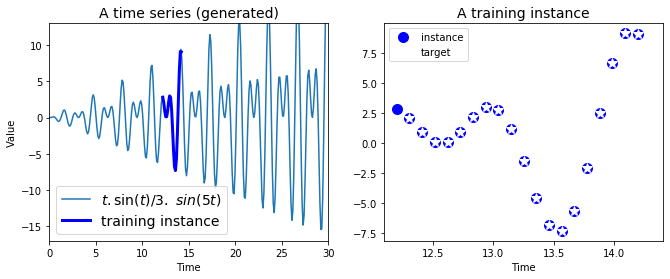

In [54]:
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(t_min, t_max,int((t_max - t_min)/resolution))
#print(t)

n_steps = 20
t_instance = np.linspace(12.2, 12.2 + resolution * (n_steps + 1), n_steps + 1 )
print("\n", t_instance)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plt.title("A time series (generated)", fontsize=14)
plt.plot(t,time_series(t), label=r"$t . \sin(t) / 3 . \ sin(5t)$")
plt.plot(t_instance[:-1],time_series(t_instance[:-1]), "b-", linewidth=3,label="training instance")
plt.legend(loc="lower left", fontsize=14)
plt.axis([0, 30, -17, 13])
plt.xlabel("Time")
plt.ylabel("Value")

plt.subplot(122)
plt.title("A training instance", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10,label="target")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()

In [55]:
X_batch, y_batch =next_batch(1, n_steps)

In [56]:
np.c_[X_batch[0], y_batch[0]]

array([[ -1.40831178,  -7.20021266],
       [ -7.20021266, -10.74950333],
       [-10.74950333, -11.28696895],
       [-11.28696895,  -8.98286723],
       [ -8.98286723,  -4.83351927],
       [ -4.83351927,  -0.28362035],
       [ -0.28362035,   3.27966138],
       [  3.27966138,   4.9835636 ],
       [  4.9835636 ,   4.72122828],
       [  4.72122828,   3.11678724],
       [  3.11678724,   1.22607615],
       [  1.22607615,   0.08936208],
       [  0.08936208,   0.30463685],
       [  0.30463685,   1.78142402],
       [  1.78142402,   3.76858285],
       [  3.76858285,   5.14878974],
       [  5.14878974,   4.89318791],
       [  4.89318791,   2.50784184],
       [  2.50784184,  -1.6980766 ],
       [ -1.6980766 ,  -6.63236566]])

In [57]:
# using an OutputProjectionWrapper
import tensorflow as tf
tf.reset_default_graph()

n_steps= 20
# what are steps 

n_inputs = 1
n_neurons = 100
# what are neurons

n_outputs = 1

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32,[None,n_steps,n_outputs])

cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)


In [58]:
# howeverwhat we want is a signle output value at each step
# right now we have 100 output vectors
# in the code above

tf.reset_default_graph()

n_steps = 20
n_inputs = 1
n_neurons = 100
n_outputs = 1

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs ])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])


In [59]:
cell = tf.contrib.rnn.OutputProjectionWrapper(
tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu),output_size=n_outputs)

In [60]:
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

W0621 10:53:54.556940 13776 deprecation.py:506] From C:\installs\Anaconda\envs\tf_gpu\lib\site-packages\tensorflow_core\contrib\rnn\python\ops\core_rnn_cell.py:104: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [61]:
learning_rate = 0.001

loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate= learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

In [62]:
saver = tf.train.Saver()

In [63]:
n_iterations = 1500
batch_size = 50

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size,n_steps )
        sess.run(training_op, feed_dict={X:X_batch,y:y_batch})
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict={X: X_batch, y:y_batch})
            print(iteration, "\tMSE:", mse)
        saver.save(sess, "./my_time_series_model_new")

0 	MSE: 30.930641
100 	MSE: 1.2928989
200 	MSE: 0.6453369
300 	MSE: 0.35422945
400 	MSE: 0.39591846
500 	MSE: 0.4956047
600 	MSE: 0.54896426
700 	MSE: 0.43058106
800 	MSE: 0.5962592
900 	MSE: 0.39129007
1000 	MSE: 0.5045849
1100 	MSE: 0.35331577
1200 	MSE: 0.375951
1300 	MSE: 0.47191137
1400 	MSE: 0.32208756


In [64]:
with tf.Session() as sess:
    saver.restore(sess, "./my_time_series_model_new")
    
    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict={X: X_new})

In [65]:
y_pred

array([[[ 2.659063  ],
        [ 0.6574485 ],
        [-0.24024044],
        [-0.21946679],
        [ 0.82045937],
        [ 2.1401563 ],
        [ 3.1313996 ],
        [ 2.809763  ],
        [ 1.1984067 ],
        [-1.5378247 ],
        [-4.635636  ],
        [-6.9377885 ],
        [-7.4691186 ],
        [-5.789379  ],
        [-2.109919  ],
        [ 2.5928087 ],
        [ 6.844426  ],
        [ 9.17884   ],
        [ 9.095196  ],
        [ 6.5777154 ]]], dtype=float32)

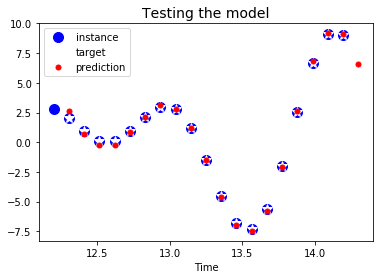

In [66]:
plt.title("Testing the model", fontsize =14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target")
plt.plot(t_instance[1:], y_pred[0, :, 0], "r.", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()

### without using outputprojectionwrapper

In [67]:
tf.reset_default_graph()
tf.set_random_seed(42)
np.random.seed(42)

n_steps = 20
n_inputs = 1
n_neurons = 100
n_outputs = 1

X = tf.placeholder(tf.float32, [None, n_steps,n_inputs])
y = tf.placeholder(tf.float32, [None,n_steps,n_outputs])


In [68]:
cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons,activation=tf.nn.relu)
rnn_outputs, states = tf.nn.dynamic_rnn(cell,X,dtype=tf.float32)

In [69]:
n_outputs = 1
learning_rate = 0.001

In [70]:
# here we are using a dense laer to give us a single output

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1,n_neurons ])
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps,n_outputs])

In [71]:
loss = tf.reduce_mean(tf.square(outputs-y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [72]:
n_iteration = 1500
batch_size = 50

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size,n_steps )
        sess.run(training_op, feed_dict={X:X_batch, y:y_batch})
        if (iteration % 100 == 0):
            mse = loss.eval(feed_dict={X:X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
        
    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict={X:X_new})
    
    saver.save(sess, "./my_time_series_model_new")
    

0 	MSE: 25.066492
100 	MSE: 1.677856
200 	MSE: 0.6082985
300 	MSE: 0.6235989
400 	MSE: 0.35068476
500 	MSE: 0.51226753
600 	MSE: 0.44000217
700 	MSE: 0.5191517
800 	MSE: 0.52564985
900 	MSE: 0.4362611
1000 	MSE: 0.36662456
1100 	MSE: 0.3639332
1200 	MSE: 0.38860077
1300 	MSE: 0.4495365
1400 	MSE: 0.36742735


In [73]:
y_pred

array([[[ 2.6651754 ],
        [ 0.6727875 ],
        [-0.29015774],
        [-0.31572396],
        [ 0.84579504],
        [ 2.3015852 ],
        [ 3.1364098 ],
        [ 2.9391062 ],
        [ 1.3079008 ],
        [-1.4421222 ],
        [-4.545011  ],
        [-6.9228435 ],
        [-7.4396462 ],
        [-5.6689634 ],
        [-1.9350648 ],
        [ 2.630643  ],
        [ 6.709119  ],
        [ 9.303075  ],
        [ 9.301439  ],
        [ 6.6610103 ]]], dtype=float32)

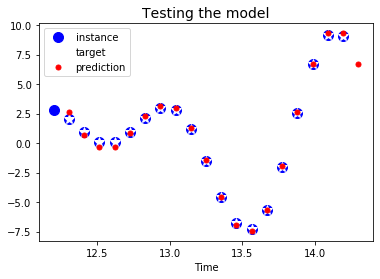

In [74]:
plt.title("Testing the model", fontsize =14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target")
plt.plot(t_instance[1:],y_pred[0,:,0], "r.", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()

### generating a creative sequence

In [75]:
with tf.Session() as sess:
    saver.restore(sess, "./my_time_series_model_new")
    
    sequence = [0.] * n_steps
    for iteration in range (300):
        X_batch = np.array(sequence[-n_steps:]).reshape(1, n_steps, 1)
        y_pred =sess.run(outputs, feed_dict={X:X_batch})
        sequence.append(y_pred[0,-1,0])

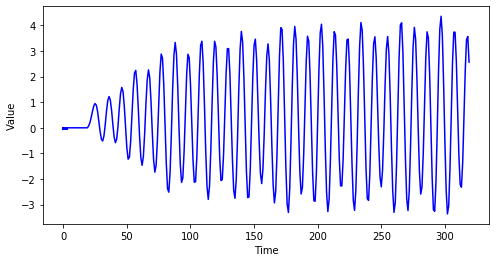

In [76]:
plt.figure(figsize=(8,4))
plt.plot(np.arange(len(sequence)), sequence, "b-")
plt.plot(t[:n_steps], sequence[:n_steps], "b-", linewidth=3)
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

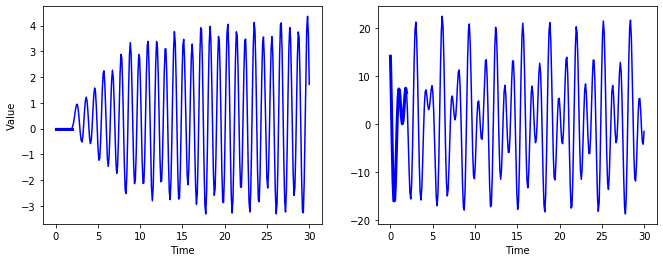

In [77]:
with tf.Session() as sess:
    saver.restore(sess, "./my_time_series_model_new")
    
    sequence1 = [0. for i in range(n_steps)]
    for iteration in range(len(t) - n_steps):
        X_batch = np.array(sequence1[-n_steps:]).reshape(1,n_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch })
        sequence1.append(y_pred[0,-1,0])
    sequence2 = [time_series(i * resolution + t_min + (t_max-t_min/3)) for i in range(n_steps)]
    for iteration in range(len(t) - n_steps):
        X_batch =np.array(sequence2[-n_steps:]).reshape(1,n_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X:X_batch})
        sequence2.append(y_pred[0,-1,0])

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.plot(t, sequence1, "b-")
plt.plot(t[:n_steps], sequence1[:n_steps], "b-",linewidth=3 )
plt.xlabel("Time")
plt.ylabel("Value")

plt.subplot(122)
plt.plot(t, sequence2, "b-")
plt.plot(t[:n_steps], sequence2[:n_steps], "b-", linewidth=3)
plt.xlabel("Time")
plt.show()

In [78]:

# with tf.Session() as sess:
#     saver.restore(sess, "./my_time_series_model_new")
    
#     sequence = [0.] * n_steps
#     for iteration in range(300):
#         X_batch = np.array(sequence[-n_steps:]).reshape(1,n_steps,1)
#         y_pred = sess.run(outputs, feed_dict={X:X_batch})

#         sequence.append(y_pred[0,-1, 0])

In [79]:
# t_min, t_max = 0, 30
# resolution = 0.1

# t = np.linspace(t_min, t_max, int((t_max - t_min) / resolution))

# plt.figure(figsize=(8,4))
# plt.plot(np.arange(len(sequence)), sequence, "b-")
# plt.plot(t[:n_steps], sequence[:n_steps], "b-", linewidth=3)
# plt.xlabel("Time")
# plt.ylabel("Value")
# plt.show()

In [80]:
# with tf.Session() as sess:
#     saver.restore(sess, "./my_time_series_model_new")

#     sequence1 = [0. for i in range(n_steps)]
#     for iteration in range(len(t) - n_steps):
#         X_batch = np.array(sequence1[-n_steps:]).reshape(1, n_steps, 1)
#         y_pred = sess.run(outputs, feed_dict={X: X_batch})
#         sequence1.append(y_pred[0, -1, 0])

#     sequence2 = [time_series(i * resolution + t_min + (t_max-t_min/3)) for i in range(n_steps)]
#     for iteration in range(len(t) - n_steps):
#         X_batch = np.array(sequence2[-n_steps:]).reshape(1, n_steps, 1)
#         y_pred = sess.run(outputs, feed_dict={X: X_batch})
#         sequence2.append(y_pred[0, -1, 0])

# plt.figure(figsize=(11,4))
# plt.subplot(121)
# plt.plot(t, sequence1, "b-")
# plt.plot(t[:n_steps], sequence1[:n_steps], "b-", linewidth=3)
# plt.xlabel("Time")
# plt.ylabel("Value")

# plt.subplot(122)
# plt.plot(t, sequence2, "b-")
# plt.plot(t[:n_steps], sequence2[:n_steps], "b-", linewidth=3)
# plt.xlabel("Time")

# plt.show()

### MultiRNNCell

In [81]:
tf.reset_default_graph()

n_inputs = 2
n_steps = 5

X = tf.placeholder(tf.float32, [None,n_steps, n_inputs])


In [82]:
n_neurons = 100
n_layers = 3

layers = [tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons) for layer in range(n_layers)]

multi_layer_cell = tf.nn.rnn_cell.MultiRNNCell(layers)
outputs, state = tf.nn.dynamic_rnn(multi_layer_cell,X, dtype=tf.float32)


In [83]:
init = tf.global_variables_initializer()

In [84]:
X_batch = np.random.rand(2, n_steps,n_inputs)

In [85]:
# with tf.Session() as sess:
#     init.run()
#     outputs_val, states_val = sess.run([outputs, states], feed_dict={X: X_batch})

In [86]:
#outputs_val.shape

# multi layer rnn has been defined above

### Dropout

In [87]:
tf.reset_default_graph()

n_inputs = 1
n_neurons = 100
n_layers = 3
n_steps = 20
n_outputs = 1

In [88]:
X = tf.placeholder(tf.float32, [None,n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None,n_steps, n_outputs])

In [89]:
keep_prob = tf.placeholder_with_default(1.0, shape=())
# if we togglekeep prob to 0 then there would be no dropout

cells = [tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons) for layer in range(n_layers)]
cells_drop = [tf.nn.rnn_cell.DropoutWrapper(cell,input_keep_prob=keep_prob ) for cell in cells]

multi_layer_cell = tf.nn.rnn_cell.MultiRNNCell(cells_drop)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

In [90]:
learning_rate = 0.01

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1,n_neurons ])
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps,n_outputs])

loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [91]:
n_iterations = 1500
batch_size =50
train_keep_prob = 0.5

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        _, mse = sess.run([training_op,loss],
                          feed_dict={X:X_batch, y:y_batch,
                                     keep_prob: train_keep_prob})
        if iteration % 100 == 0:
            print(iteration, "Training MSE:", mse)
    
    saver.save(sess, "./my_dropout_time_series_model")

0 Training MSE: 36.55729
100 Training MSE: 12.16724
200 Training MSE: 11.411164
300 Training MSE: 11.5430565
400 Training MSE: 7.510572
500 Training MSE: 10.349948
600 Training MSE: 10.404901
700 Training MSE: 13.412514
800 Training MSE: 9.1854925
900 Training MSE: 10.117469
1000 Training MSE: 13.271496
1100 Training MSE: 10.342362
1200 Training MSE: 11.073647
1300 Training MSE: 13.793517
1400 Training MSE: 11.609578


In [92]:
with tf.Session() as sess:
    saver.restore(sess, "my_dropout_time_series_model")
    
    X_new = time_series(np.array(t_instance[:-1]).reshape(-1, n_steps,n_inputs))
    y_pred = sess.run(outputs, feed_dict={X:X_new})

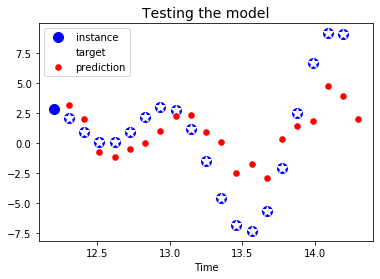

In [93]:
plt.title("Testing the model", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:],time_series(t_instance[1:]), "w*", markersize=10, label="target")
plt.plot(t_instance[1:], y_pred[0,:,0],"r.", markersize=11,label="prediction")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()

### LSTM

In [94]:
# using an LSTM

tf.reset_default_graph()

lstm_cell = tf.nn.rnn_cell.BasicLSTMCell(num_units=n_neurons)

W0621 11:02:34.763604 13776 deprecation.py:323] From <ipython-input-94-bf2b5e780551>:5: BasicLSTMCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.


In [95]:
n_steps = 28
n_inputs = 28
n_neurons = 150
n_outputs = 10
n_layers = 3

learning_rate = 0.001

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

lstm_cells = [tf.nn.rnn_cell.BasicLSTMCell(num_units=n_neurons)
              for layer in range(n_layers)]
multi_cell = tf.nn.rnn_cell.MultiRNNCell(lstm_cells)
outputs, states = tf.nn.dynamic_rnn(multi_cell, X, dtype=tf.float32)
top_layer_h_state = states[-1][1]
logits = tf.layers.dense(top_layer_h_state, n_outputs, name="softmax")
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy, name="loss")
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
init = tf.global_variables_initializer()

In [96]:
states

(LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_3:0' shape=(?, 150) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_4:0' shape=(?, 150) dtype=float32>),
 LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_5:0' shape=(?, 150) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_6:0' shape=(?, 150) dtype=float32>),
 LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_7:0' shape=(?, 150) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_8:0' shape=(?, 150) dtype=float32>))

In [97]:
top_layer_h_state

<tf.Tensor 'rnn/while/Exit_8:0' shape=(?, 150) dtype=float32>

In [98]:
n_epochs = 10
batch_size =150

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            X_batch = X_batch.reshape((-1, n_steps, n_inputs ))
            sess.run(training_op, feed_dict={X:X_batch, y:y_batch})
        acc_batch = accuracy.eval(feed_dict={X:X_batch, y:y_batch})
        acc_test = accuracy.eval(feed_dict={X:X_test, y:y_test})
        print(epoch, "last batch acc: ", acc_batch, "test: ", acc_test)

0 last batch acc:  0.96 test:  0.9571
1 last batch acc:  0.97333336 test:  0.972
2 last batch acc:  0.96666664 test:  0.9772
3 last batch acc:  0.98 test:  0.9779
4 last batch acc:  0.99333334 test:  0.9793
5 last batch acc:  0.99333334 test:  0.981
6 last batch acc:  0.9866667 test:  0.9836
7 last batch acc:  1.0 test:  0.9858
8 last batch acc:  1.0 test:  0.9864
9 last batch acc:  1.0 test:  0.987


In [99]:
lstm_cell = tf.nn.rnn_cell.LSTMCell(num_units=n_neurons, use_peepholes=True)

W0621 11:05:22.965405 13776 deprecation.py:323] From <ipython-input-99-24b025f4b732>:1: LSTMCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.


In [100]:
gru_cell = tf.nn.rnn_cell.GRUCell(num_units=n_neurons)

W0621 11:05:22.971388 13776 deprecation.py:323] From <ipython-input-100-4196517ff9aa>:1: GRUCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is equivalent as tf.keras.layers.GRUCell, and will be replaced by that in Tensorflow 2.0.


## Embeddings

In [101]:
from six.moves import urllib

import errno
import os
import zipfile

WORDS_PATH = "datasets/words"
WORDS_URL = 'http://mattmahoney.net/dc/text8.zip'

def fetch_word_data(words_url = WORDS_URL, words_path=WORDS_PATH):
    os.makedirs(words_path, exist_ok=True)
    zip_path = os.path.join(words_path, "words.zip")
    if not os.path.exists(zip_path):
        urllib.request.urlretrieve(words_url, zip_path)
    with zipfile.ZipFile(zip_path) as f:
        data = f.read(f.namelist()[0])
    return data.decode("ascii").split()


In [102]:
words = fetch_word_data()

In [103]:
words[:5]

['anarchism', 'originated', 'as', 'a', 'term']

In [104]:
words[:10]
#words has all the words

['anarchism',
 'originated',
 'as',
 'a',
 'term',
 'of',
 'abuse',
 'first',
 'used',
 'against']

### Build the dictionary

In [105]:
from collections import Counter
import numpy as np
vocabulary_size =50000

'''
You should first preprocess the sentence and break it into a list of known words. For
example you may remove unnecessary characters, replace unknown words by a pre‐
defined token word such as “[UNK]”, replace numerical values by “[NUM]”, replace
URLs by “[URL]”, and so on. Once you have a list of known words, you can look up
each word’s integer identifier (from 0 to 49999) in a dictionary, for example [72, 3335,
288].
'''

vocabulary = [("UNK", None)] + Counter(words).most_common(vocabulary_size -1)
# print(vocabulary)
# we selected the common 50000 words from words

vocabulary = np.array([word for word, _ in vocabulary])
print(vocabulary[:5])
# seperated out the words

dictionary = { word: code for code, word in enumerate(vocabulary)}
#print(dictionary)
# created a dictionaly from 0 to 50000 using words

data = np.array([dictionary.get(word, 0) for word in words])
print(data)
# getting the actual number of the word in words

['UNK' 'the' 'of' 'and' 'one']
[5234 3081   12 ...   22   16   73]


In [106]:
" ".join(words[:9]), data[:9]

('anarchism originated as a term of abuse first used',
 array([5234, 3081,   12,    6,  195,    2, 3134,   46,   59]))

In [107]:
" ".join([vocabulary[word_index] for word_index in [5234, 3081, 12, 6, 195, 2, 3134, 46, 59] ])

'anarchism originated as a term of abuse first used'

In [108]:
words[24], data[24]

# understood how dictionary was created.

('culottes', 0)

## Generate Batches

In [109]:
from collections import deque

def generate_batch(batch_size, num_skips, skip_window):
    global data_index
    assert batch_size % num_skips == 0 
    # in assert if condition is not met then error is raised
    
    assert num_skips <= 2 * skip_window
    
    batch = np.ndarray(shape=[batch_size], dtype=np.int32)
    labels = np.ndarray(shape=[batch_size, 1], dtype=np.int32)
    # arrays created
    
    span = 2 * skip_window + 1
    buffer = deque(maxlen=span)
    
    for _ in range(span):
        buffer.append(data[data_index])
        data_index = (data_index + 1) % len(data)
        print("data_index in span: ", data_index)
        
    for i in range(batch_size // num_skips):
        target = skip_window # target label at center to buffer
        targets_to_avoid = [ skip_window ]
        for j in range(num_skips):
            while target in targets_to_avoid:
                target = np.random.randint(0, span)
            targets_to_avoid.append(target)
            batch[i * num_skips + j] = buffer[skip_window]
            labels[i *num_skips + j] = buffer[target]
        buffer.append(data[data_index])
        data_index = (data_index + 1) % len(data)
    return batch, labels



In [110]:
batch, labels = generate_batch(10, 2,1)

print(batch)
print(labels)

data_index in span:  56
data_index in span:  57
data_index in span:  58
[ 54  54 540 540  98  98  12  12   6   6]
[[ 540]
 [  37]
 [  98]
 [  54]
 [ 540]
 [  12]
 [   6]
 [  98]
 [  12]
 [1424]]


In [111]:
np.random.seed(42)

In [112]:
data_index = 0
batch, labels = generate_batch(8,2,1)

data_index in span:  1
data_index in span:  2
data_index in span:  3


In [113]:
batch, [vocabulary[word] for word in batch]

(array([3081, 3081,   12,   12,    6,    6,  195,  195]),
 ['originated', 'originated', 'as', 'as', 'a', 'a', 'term', 'term'])

In [114]:
labels, [vocabulary[word] for word in labels[:, 0]]

(array([[  12],
        [5234],
        [   6],
        [3081],
        [  12],
        [ 195],
        [   2],
        [   6]]),
 ['as', 'anarchism', 'a', 'originated', 'as', 'term', 'of', 'a'])

## Building the model

In [115]:
batch_size = 128
embedding_size = 128  # Dimension of the embedding vector.
skip_window = 1       # How many words to consider left and right.
num_skips = 2         # How many times to reuse an input to generate a label.

# We pick a random validation set to sample nearest neighbors. Here we limit the
# validation samples to the words that have a low numeric ID, which by
# construction are also the most frequent.
valid_size = 16     # Random set of words to evaluate similarity on.
valid_window = 100  # Only pick dev samples in the head of the distribution.
valid_examples = np.random.choice(valid_window, valid_size, replace=False)
num_sampled = 64    # Number of negative examples to sample.

learning_rate = 0.01

In [116]:
import tensorflow as tf

tf.reset_default_graph()

#Input data
train_labels = tf.placeholder(tf.int32, shape=[batch_size, 1])
valid_dataset = tf.constant(valid_examples, dtype=tf.int32)

In [117]:
vocabulary_size =50000
embedding_size = 150

# look up embeddings for inputs

init_embeds = tf.random_uniform([vocabulary_size, embedding_size], -1.0,1.0)
embeddings = tf.Variable(init_embeds)

In [118]:
train_inputs = tf.placeholder(tf.int32, shape=[None])
embed = tf.nn.embedding_lookup(embeddings, train_inputs)

In [119]:
# Construct the variables for the NCE loss
nce_weights = tf.Variable(
    tf.truncated_normal([vocabulary_size, embedding_size],
                        stddev=1.0 / np.sqrt(embedding_size)))
nce_biases = tf.Variable(tf.zeros([vocabulary_size]))

# Compute the average NCE loss for the batch.
# tf.nce_loss automatically draws a new sample of the negative labels each
# time we evaluate the loss.
loss = tf.reduce_mean(
    tf.nn.nce_loss(nce_weights, nce_biases, train_labels, embed,
                   num_sampled, vocabulary_size))

# Construct the Adam optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

# Compute the cosine similarity between minibatch examples and all embeddings.
norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), axis=1, keepdims=True))
normalized_embeddings = embeddings / norm
valid_embeddings = tf.nn.embedding_lookup(normalized_embeddings, valid_dataset)
similarity = tf.matmul(valid_embeddings, normalized_embeddings, transpose_b=True)

# Add variable initializer.
init = tf.global_variables_initializer()

### Train the model

In [120]:
num_steps = 10001

with tf.Session() as session:
    init.run()

    average_loss = 0
    for step in range(num_steps):
        print("\rIteration: {}".format(step), end="\t")
        batch_inputs, batch_labels = generate_batch(batch_size, num_skips, skip_window)
        feed_dict = {train_inputs : batch_inputs, train_labels : batch_labels}

        # We perform one update step by evaluating the training op (including it
        # in the list of returned values for session.run()
        _, loss_val = session.run([training_op, loss], feed_dict=feed_dict)
        average_loss += loss_val

        if step % 2000 == 0:
            if step > 0:
                average_loss /= 2000
            # The average loss is an estimate of the loss over the last 2000 batches.
            print("Average loss at step ", step, ": ", average_loss)
            average_loss = 0

        # Note that this is expensive (~20% slowdown if computed every 500 steps)
        if step % 10000 == 0:
            sim = similarity.eval()
            for i in range(valid_size):
                valid_word = vocabulary[valid_examples[i]]
                top_k = 8 # number of nearest neighbors
                nearest = (-sim[i, :]).argsort()[1:top_k+1]
                log_str = "Nearest to %s:" % valid_word
                for k in range(top_k):
                    close_word = vocabulary[nearest[k]]
                    log_str = "%s %s," % (log_str, close_word)
                print(log_str)

    final_embeddings = normalized_embeddings.eval()

Iteration: 0	data_index in span:  8
data_index in span:  9
data_index in span:  10
Average loss at step  0 :  286.3756103515625
Nearest to over: stare, typed, haddo, model, hydroxide, weekday, blooming, sancti,
Nearest to one: dimmu, mst, waldseem, towel, crawl, tirthankaras, boroughs, plummer,
Nearest to were: diputados, polymorphism, dollars, translate, balder, handsome, wagoner, crafts,
Nearest to may: sweetened, arrive, cade, nazarene, reptile, adolfo, seafaring, perthshire,
Nearest to two: keitai, hammers, acrobatics, definability, danelaw, trucks, ridgway, paws,
Nearest to its: firsts, nuclear, formatting, sunga, feminist, commemorative, liberals, snooker,
Nearest to than: redefining, loma, zak, agrippina, optimism, heiden, venue, ivorian,
Nearest to these: locale, flogging, hypnos, proceed, kattegat, cock, withdrawn, transcend,
Nearest to they: misalignment, sweep, demesne, zap, fishes, photosynthetic, predefined, keiretsu,
Nearest to is: ranch, array, moth, pacemaker, intergove

Iteration: 75	data_index in span:  5033
data_index in span:  5034
data_index in span:  5035
Iteration: 76	data_index in span:  5100
data_index in span:  5101
data_index in span:  5102
Iteration: 77	data_index in span:  5167
data_index in span:  5168
data_index in span:  5169
Iteration: 78	data_index in span:  5234
data_index in span:  5235
data_index in span:  5236
Iteration: 79	data_index in span:  5301
data_index in span:  5302
data_index in span:  5303
Iteration: 80	data_index in span:  5368
data_index in span:  5369
data_index in span:  5370
Iteration: 81	data_index in span:  5435
data_index in span:  5436
data_index in span:  5437
Iteration: 82	data_index in span:  5502
data_index in span:  5503
data_index in span:  5504
Iteration: 83	data_index in span:  5569
data_index in span:  5570
data_index in span:  5571
Iteration: 84	data_index in span:  5636
data_index in span:  5637
data_index in span:  5638
Iteration: 85	data_index in span:  5703
data_index in span:  5704
data_index in 

Iteration: 166	data_index in span:  11130
data_index in span:  11131
data_index in span:  11132
Iteration: 167	data_index in span:  11197
data_index in span:  11198
data_index in span:  11199
Iteration: 168	data_index in span:  11264
data_index in span:  11265
data_index in span:  11266
Iteration: 169	data_index in span:  11331
data_index in span:  11332
data_index in span:  11333
Iteration: 170	data_index in span:  11398
data_index in span:  11399
data_index in span:  11400
Iteration: 171	data_index in span:  11465
data_index in span:  11466
data_index in span:  11467
Iteration: 172	data_index in span:  11532
data_index in span:  11533
data_index in span:  11534
Iteration: 173	data_index in span:  11599
data_index in span:  11600
data_index in span:  11601
Iteration: 174	data_index in span:  11666
data_index in span:  11667
data_index in span:  11668
Iteration: 175	data_index in span:  11733
data_index in span:  11734
data_index in span:  11735
Iteration: 176	data_index in span:  1180

Iteration: 257	data_index in span:  17227
data_index in span:  17228
data_index in span:  17229
Iteration: 258	data_index in span:  17294
data_index in span:  17295
data_index in span:  17296
Iteration: 259	data_index in span:  17361
data_index in span:  17362
data_index in span:  17363
Iteration: 260	data_index in span:  17428
data_index in span:  17429
data_index in span:  17430
Iteration: 261	data_index in span:  17495
data_index in span:  17496
data_index in span:  17497
Iteration: 262	data_index in span:  17562
data_index in span:  17563
data_index in span:  17564
Iteration: 263	data_index in span:  17629
data_index in span:  17630
data_index in span:  17631
Iteration: 264	data_index in span:  17696
data_index in span:  17697
data_index in span:  17698
Iteration: 265	data_index in span:  17763
data_index in span:  17764
data_index in span:  17765
Iteration: 266	data_index in span:  17830
data_index in span:  17831
data_index in span:  17832
Iteration: 267	data_index in span:  1789

Iteration: 344	data_index in span:  23056
data_index in span:  23057
data_index in span:  23058
Iteration: 345	data_index in span:  23123
data_index in span:  23124
data_index in span:  23125
Iteration: 346	data_index in span:  23190
data_index in span:  23191
data_index in span:  23192
Iteration: 347	data_index in span:  23257
data_index in span:  23258
data_index in span:  23259
Iteration: 348	data_index in span:  23324
data_index in span:  23325
data_index in span:  23326
Iteration: 349	data_index in span:  23391
data_index in span:  23392
data_index in span:  23393
Iteration: 350	data_index in span:  23458
data_index in span:  23459
data_index in span:  23460
Iteration: 351	data_index in span:  23525
data_index in span:  23526
data_index in span:  23527
Iteration: 352	data_index in span:  23592
data_index in span:  23593
data_index in span:  23594
Iteration: 353	data_index in span:  23659
data_index in span:  23660
data_index in span:  23661
Iteration: 354	data_index in span:  2372

Iteration: 435	data_index in span:  29153
data_index in span:  29154
data_index in span:  29155
Iteration: 436	data_index in span:  29220
data_index in span:  29221
data_index in span:  29222
Iteration: 437	data_index in span:  29287
data_index in span:  29288
data_index in span:  29289
Iteration: 438	data_index in span:  29354
data_index in span:  29355
data_index in span:  29356
Iteration: 439	data_index in span:  29421
data_index in span:  29422
data_index in span:  29423
Iteration: 440	data_index in span:  29488
data_index in span:  29489
data_index in span:  29490
Iteration: 441	data_index in span:  29555
data_index in span:  29556
data_index in span:  29557
Iteration: 442	data_index in span:  29622
data_index in span:  29623
data_index in span:  29624
Iteration: 443	data_index in span:  29689
data_index in span:  29690
data_index in span:  29691
Iteration: 444	data_index in span:  29756
data_index in span:  29757
data_index in span:  29758
Iteration: 445	data_index in span:  2982

Iteration: 525	data_index in span:  35183
data_index in span:  35184
data_index in span:  35185
Iteration: 526	data_index in span:  35250
data_index in span:  35251
data_index in span:  35252
Iteration: 527	data_index in span:  35317
data_index in span:  35318
data_index in span:  35319
Iteration: 528	data_index in span:  35384
data_index in span:  35385
data_index in span:  35386
Iteration: 529	data_index in span:  35451
data_index in span:  35452
data_index in span:  35453
Iteration: 530	data_index in span:  35518
data_index in span:  35519
data_index in span:  35520
Iteration: 531	data_index in span:  35585
data_index in span:  35586
data_index in span:  35587
Iteration: 532	data_index in span:  35652
data_index in span:  35653
data_index in span:  35654
Iteration: 533	data_index in span:  35719
data_index in span:  35720
data_index in span:  35721
Iteration: 534	data_index in span:  35786
data_index in span:  35787
data_index in span:  35788
Iteration: 535	data_index in span:  3585

Iteration: 612	data_index in span:  41012
data_index in span:  41013
data_index in span:  41014
Iteration: 613	data_index in span:  41079
data_index in span:  41080
data_index in span:  41081
Iteration: 614	data_index in span:  41146
data_index in span:  41147
data_index in span:  41148
Iteration: 615	data_index in span:  41213
data_index in span:  41214
data_index in span:  41215
Iteration: 616	data_index in span:  41280
data_index in span:  41281
data_index in span:  41282
Iteration: 617	data_index in span:  41347
data_index in span:  41348
data_index in span:  41349
Iteration: 618	data_index in span:  41414
data_index in span:  41415
data_index in span:  41416
Iteration: 619	data_index in span:  41481
data_index in span:  41482
data_index in span:  41483
Iteration: 620	data_index in span:  41548
data_index in span:  41549
data_index in span:  41550
Iteration: 621	data_index in span:  41615
data_index in span:  41616
data_index in span:  41617
Iteration: 622	data_index in span:  4168

Iteration: 703	data_index in span:  47109
data_index in span:  47110
data_index in span:  47111
Iteration: 704	data_index in span:  47176
data_index in span:  47177
data_index in span:  47178
Iteration: 705	data_index in span:  47243
data_index in span:  47244
data_index in span:  47245
Iteration: 706	data_index in span:  47310
data_index in span:  47311
data_index in span:  47312
Iteration: 707	data_index in span:  47377
data_index in span:  47378
data_index in span:  47379
Iteration: 708	data_index in span:  47444
data_index in span:  47445
data_index in span:  47446
Iteration: 709	data_index in span:  47511
data_index in span:  47512
data_index in span:  47513
Iteration: 710	data_index in span:  47578
data_index in span:  47579
data_index in span:  47580
Iteration: 711	data_index in span:  47645
data_index in span:  47646
data_index in span:  47647
Iteration: 712	data_index in span:  47712
data_index in span:  47713
data_index in span:  47714
Iteration: 713	data_index in span:  4777

Iteration: 792	data_index in span:  53072
data_index in span:  53073
data_index in span:  53074
Iteration: 793	data_index in span:  53139
data_index in span:  53140
data_index in span:  53141
Iteration: 794	data_index in span:  53206
data_index in span:  53207
data_index in span:  53208
Iteration: 795	data_index in span:  53273
data_index in span:  53274
data_index in span:  53275
Iteration: 796	data_index in span:  53340
data_index in span:  53341
data_index in span:  53342
Iteration: 797	data_index in span:  53407
data_index in span:  53408
data_index in span:  53409
Iteration: 798	data_index in span:  53474
data_index in span:  53475
data_index in span:  53476
Iteration: 799	data_index in span:  53541
data_index in span:  53542
data_index in span:  53543
Iteration: 800	data_index in span:  53608
data_index in span:  53609
data_index in span:  53610
Iteration: 801	data_index in span:  53675
data_index in span:  53676
data_index in span:  53677
Iteration: 802	data_index in span:  5374

Iteration: 882	data_index in span:  59102
data_index in span:  59103
data_index in span:  59104
Iteration: 883	data_index in span:  59169
data_index in span:  59170
data_index in span:  59171
Iteration: 884	data_index in span:  59236
data_index in span:  59237
data_index in span:  59238
Iteration: 885	data_index in span:  59303
data_index in span:  59304
data_index in span:  59305
Iteration: 886	data_index in span:  59370
data_index in span:  59371
data_index in span:  59372
Iteration: 887	data_index in span:  59437
data_index in span:  59438
data_index in span:  59439
Iteration: 888	data_index in span:  59504
data_index in span:  59505
data_index in span:  59506
Iteration: 889	data_index in span:  59571
data_index in span:  59572
data_index in span:  59573
Iteration: 890	data_index in span:  59638
data_index in span:  59639
data_index in span:  59640
Iteration: 891	data_index in span:  59705
data_index in span:  59706
data_index in span:  59707
Iteration: 892	data_index in span:  5977

data_index in span:  65066
data_index in span:  65067
Iteration: 972	data_index in span:  65132
data_index in span:  65133
data_index in span:  65134
Iteration: 973	data_index in span:  65199
data_index in span:  65200
data_index in span:  65201
Iteration: 974	data_index in span:  65266
data_index in span:  65267
data_index in span:  65268
Iteration: 975	data_index in span:  65333
data_index in span:  65334
data_index in span:  65335
Iteration: 976	data_index in span:  65400
data_index in span:  65401
data_index in span:  65402
Iteration: 977	data_index in span:  65467
data_index in span:  65468
data_index in span:  65469
Iteration: 978	data_index in span:  65534
data_index in span:  65535
data_index in span:  65536
Iteration: 979	data_index in span:  65601
data_index in span:  65602
data_index in span:  65603
Iteration: 980	data_index in span:  65668
data_index in span:  65669
data_index in span:  65670
Iteration: 981	data_index in span:  65735
data_index in span:  65736
data_index in

Iteration: 1059	data_index in span:  70961
data_index in span:  70962
data_index in span:  70963
Iteration: 1060	data_index in span:  71028
data_index in span:  71029
data_index in span:  71030
Iteration: 1061	data_index in span:  71095
data_index in span:  71096
data_index in span:  71097
Iteration: 1062	data_index in span:  71162
data_index in span:  71163
data_index in span:  71164
Iteration: 1063	data_index in span:  71229
data_index in span:  71230
data_index in span:  71231
Iteration: 1064	data_index in span:  71296
data_index in span:  71297
data_index in span:  71298
Iteration: 1065	data_index in span:  71363
data_index in span:  71364
data_index in span:  71365
Iteration: 1066	data_index in span:  71430
data_index in span:  71431
data_index in span:  71432
Iteration: 1067	data_index in span:  71497
data_index in span:  71498
data_index in span:  71499
Iteration: 1068	data_index in span:  71564
data_index in span:  71565
data_index in span:  71566
Iteration: 1069	data_index in 

Iteration: 1149	data_index in span:  76991
data_index in span:  76992
data_index in span:  76993
Iteration: 1150	data_index in span:  77058
data_index in span:  77059
data_index in span:  77060
Iteration: 1151	data_index in span:  77125
data_index in span:  77126
data_index in span:  77127
Iteration: 1152	data_index in span:  77192
data_index in span:  77193
data_index in span:  77194
Iteration: 1153	data_index in span:  77259
data_index in span:  77260
data_index in span:  77261
Iteration: 1154	data_index in span:  77326
data_index in span:  77327
data_index in span:  77328
Iteration: 1155	data_index in span:  77393
data_index in span:  77394
data_index in span:  77395
Iteration: 1156	data_index in span:  77460
data_index in span:  77461
data_index in span:  77462
Iteration: 1157	data_index in span:  77527
data_index in span:  77528
data_index in span:  77529
Iteration: 1158	data_index in span:  77594
data_index in span:  77595
data_index in span:  77596
Iteration: 1159	data_index in 

Iteration: 1239	data_index in span:  83021
data_index in span:  83022
data_index in span:  83023
Iteration: 1240	data_index in span:  83088
data_index in span:  83089
data_index in span:  83090
Iteration: 1241	data_index in span:  83155
data_index in span:  83156
data_index in span:  83157
Iteration: 1242	data_index in span:  83222
data_index in span:  83223
data_index in span:  83224
Iteration: 1243	data_index in span:  83289
data_index in span:  83290
data_index in span:  83291
Iteration: 1244	data_index in span:  83356
data_index in span:  83357
data_index in span:  83358
Iteration: 1245	data_index in span:  83423
data_index in span:  83424
data_index in span:  83425
Iteration: 1246	data_index in span:  83490
data_index in span:  83491
data_index in span:  83492
Iteration: 1247	data_index in span:  83557
data_index in span:  83558
data_index in span:  83559
Iteration: 1248	data_index in span:  83624
data_index in span:  83625
data_index in span:  83626
Iteration: 1249	data_index in 

data_index in span:  88852
Iteration: 1327	data_index in span:  88917
data_index in span:  88918
data_index in span:  88919
Iteration: 1328	data_index in span:  88984
data_index in span:  88985
data_index in span:  88986
Iteration: 1329	data_index in span:  89051
data_index in span:  89052
data_index in span:  89053
Iteration: 1330	data_index in span:  89118
data_index in span:  89119
data_index in span:  89120
Iteration: 1331	data_index in span:  89185
data_index in span:  89186
data_index in span:  89187
Iteration: 1332	data_index in span:  89252
data_index in span:  89253
data_index in span:  89254
Iteration: 1333	data_index in span:  89319
data_index in span:  89320
data_index in span:  89321
Iteration: 1334	data_index in span:  89386
data_index in span:  89387
data_index in span:  89388
Iteration: 1335	data_index in span:  89453
data_index in span:  89454
data_index in span:  89455
Iteration: 1336	data_index in span:  89520
data_index in span:  89521
data_index in span:  89522
Ite

data_index in span:  94814
data_index in span:  94815
Iteration: 1416	data_index in span:  94880
data_index in span:  94881
data_index in span:  94882
Iteration: 1417	data_index in span:  94947
data_index in span:  94948
data_index in span:  94949
Iteration: 1418	data_index in span:  95014
data_index in span:  95015
data_index in span:  95016
Iteration: 1419	data_index in span:  95081
data_index in span:  95082
data_index in span:  95083
Iteration: 1420	data_index in span:  95148
data_index in span:  95149
data_index in span:  95150
Iteration: 1421	data_index in span:  95215
data_index in span:  95216
data_index in span:  95217
Iteration: 1422	data_index in span:  95282
data_index in span:  95283
data_index in span:  95284
Iteration: 1423	data_index in span:  95349
data_index in span:  95350
data_index in span:  95351
Iteration: 1424	data_index in span:  95416
data_index in span:  95417
data_index in span:  95418
Iteration: 1425	data_index in span:  95483
data_index in span:  95484
dat

Iteration: 1506	data_index in span:  100910
data_index in span:  100911
data_index in span:  100912
Iteration: 1507	data_index in span:  100977
data_index in span:  100978
data_index in span:  100979
Iteration: 1508	data_index in span:  101044
data_index in span:  101045
data_index in span:  101046
Iteration: 1509	data_index in span:  101111
data_index in span:  101112
data_index in span:  101113
Iteration: 1510	data_index in span:  101178
data_index in span:  101179
data_index in span:  101180
Iteration: 1511	data_index in span:  101245
data_index in span:  101246
data_index in span:  101247
Iteration: 1512	data_index in span:  101312
data_index in span:  101313
data_index in span:  101314
Iteration: 1513	data_index in span:  101379
data_index in span:  101380
data_index in span:  101381
Iteration: 1514	data_index in span:  101446
data_index in span:  101447
data_index in span:  101448
Iteration: 1515	data_index in span:  101513
data_index in span:  101514
data_index in span:  101515


Iteration: 1593	data_index in span:  106739
data_index in span:  106740
data_index in span:  106741
Iteration: 1594	data_index in span:  106806
data_index in span:  106807
data_index in span:  106808
Iteration: 1595	data_index in span:  106873
data_index in span:  106874
data_index in span:  106875
Iteration: 1596	data_index in span:  106940
data_index in span:  106941
data_index in span:  106942
Iteration: 1597	data_index in span:  107007
data_index in span:  107008
data_index in span:  107009
Iteration: 1598	data_index in span:  107074
data_index in span:  107075
data_index in span:  107076
Iteration: 1599	data_index in span:  107141
data_index in span:  107142
data_index in span:  107143
Iteration: 1600	data_index in span:  107208
data_index in span:  107209
data_index in span:  107210
Iteration: 1601	data_index in span:  107275
data_index in span:  107276
data_index in span:  107277
Iteration: 1602	data_index in span:  107342
data_index in span:  107343
data_index in span:  107344


Iteration: 1684	data_index in span:  112836
data_index in span:  112837
data_index in span:  112838
Iteration: 1685	data_index in span:  112903
data_index in span:  112904
data_index in span:  112905
Iteration: 1686	data_index in span:  112970
data_index in span:  112971
data_index in span:  112972
Iteration: 1687	data_index in span:  113037
data_index in span:  113038
data_index in span:  113039
Iteration: 1688	data_index in span:  113104
data_index in span:  113105
data_index in span:  113106
Iteration: 1689	data_index in span:  113171
data_index in span:  113172
data_index in span:  113173
Iteration: 1690	data_index in span:  113238
data_index in span:  113239
data_index in span:  113240
Iteration: 1691	data_index in span:  113305
data_index in span:  113306
data_index in span:  113307
Iteration: 1692	data_index in span:  113372
data_index in span:  113373
data_index in span:  113374
Iteration: 1693	data_index in span:  113439
data_index in span:  113440
data_index in span:  113441


Iteration: 1771	data_index in span:  118665
data_index in span:  118666
data_index in span:  118667
Iteration: 1772	data_index in span:  118732
data_index in span:  118733
data_index in span:  118734
Iteration: 1773	data_index in span:  118799
data_index in span:  118800
data_index in span:  118801
Iteration: 1774	data_index in span:  118866
data_index in span:  118867
data_index in span:  118868
Iteration: 1775	data_index in span:  118933
data_index in span:  118934
data_index in span:  118935
Iteration: 1776	data_index in span:  119000
data_index in span:  119001
data_index in span:  119002
Iteration: 1777	data_index in span:  119067
data_index in span:  119068
data_index in span:  119069
Iteration: 1778	data_index in span:  119134
data_index in span:  119135
data_index in span:  119136
Iteration: 1779	data_index in span:  119201
data_index in span:  119202
data_index in span:  119203
Iteration: 1780	data_index in span:  119268
data_index in span:  119269
data_index in span:  119270


data_index in span:  124696
data_index in span:  124697
Iteration: 1862	data_index in span:  124762
data_index in span:  124763
data_index in span:  124764
Iteration: 1863	data_index in span:  124829
data_index in span:  124830
data_index in span:  124831
Iteration: 1864	data_index in span:  124896
data_index in span:  124897
data_index in span:  124898
Iteration: 1865	data_index in span:  124963
data_index in span:  124964
data_index in span:  124965
Iteration: 1866	data_index in span:  125030
data_index in span:  125031
data_index in span:  125032
Iteration: 1867	data_index in span:  125097
data_index in span:  125098
data_index in span:  125099
Iteration: 1868	data_index in span:  125164
data_index in span:  125165
data_index in span:  125166
Iteration: 1869	data_index in span:  125231
data_index in span:  125232
data_index in span:  125233
Iteration: 1870	data_index in span:  125298
data_index in span:  125299
data_index in span:  125300
Iteration: 1871	data_index in span:  125365


Iteration: 1951	data_index in span:  130725
data_index in span:  130726
data_index in span:  130727
Iteration: 1952	data_index in span:  130792
data_index in span:  130793
data_index in span:  130794
Iteration: 1953	data_index in span:  130859
data_index in span:  130860
data_index in span:  130861
Iteration: 1954	data_index in span:  130926
data_index in span:  130927
data_index in span:  130928
Iteration: 1955	data_index in span:  130993
data_index in span:  130994
data_index in span:  130995
Iteration: 1956	data_index in span:  131060
data_index in span:  131061
data_index in span:  131062
Iteration: 1957	data_index in span:  131127
data_index in span:  131128
data_index in span:  131129
Iteration: 1958	data_index in span:  131194
data_index in span:  131195
data_index in span:  131196
Iteration: 1959	data_index in span:  131261
data_index in span:  131262
data_index in span:  131263
Iteration: 1960	data_index in span:  131328
data_index in span:  131329
data_index in span:  131330


Iteration: 2040	data_index in span:  136688
data_index in span:  136689
data_index in span:  136690
Iteration: 2041	data_index in span:  136755
data_index in span:  136756
data_index in span:  136757
Iteration: 2042	data_index in span:  136822
data_index in span:  136823
data_index in span:  136824
Iteration: 2043	data_index in span:  136889
data_index in span:  136890
data_index in span:  136891
Iteration: 2044	data_index in span:  136956
data_index in span:  136957
data_index in span:  136958
Iteration: 2045	data_index in span:  137023
data_index in span:  137024
data_index in span:  137025
Iteration: 2046	data_index in span:  137090
data_index in span:  137091
data_index in span:  137092
Iteration: 2047	data_index in span:  137157
data_index in span:  137158
data_index in span:  137159
Iteration: 2048	data_index in span:  137224
data_index in span:  137225
data_index in span:  137226
Iteration: 2049	data_index in span:  137291
data_index in span:  137292
data_index in span:  137293


data_index in span:  142586
Iteration: 2129	data_index in span:  142651
data_index in span:  142652
data_index in span:  142653
Iteration: 2130	data_index in span:  142718
data_index in span:  142719
data_index in span:  142720
Iteration: 2131	data_index in span:  142785
data_index in span:  142786
data_index in span:  142787
Iteration: 2132	data_index in span:  142852
data_index in span:  142853
data_index in span:  142854
Iteration: 2133	data_index in span:  142919
data_index in span:  142920
data_index in span:  142921
Iteration: 2134	data_index in span:  142986
data_index in span:  142987
data_index in span:  142988
Iteration: 2135	data_index in span:  143053
data_index in span:  143054
data_index in span:  143055
Iteration: 2136	data_index in span:  143120
data_index in span:  143121
data_index in span:  143122
Iteration: 2137	data_index in span:  143187
data_index in span:  143188
data_index in span:  143189
Iteration: 2138	data_index in span:  143254
data_index in span:  143255


data_index in span:  148549
Iteration: 2218	data_index in span:  148614
data_index in span:  148615
data_index in span:  148616
Iteration: 2219	data_index in span:  148681
data_index in span:  148682
data_index in span:  148683
Iteration: 2220	data_index in span:  148748
data_index in span:  148749
data_index in span:  148750
Iteration: 2221	data_index in span:  148815
data_index in span:  148816
data_index in span:  148817
Iteration: 2222	data_index in span:  148882
data_index in span:  148883
data_index in span:  148884
Iteration: 2223	data_index in span:  148949
data_index in span:  148950
data_index in span:  148951
Iteration: 2224	data_index in span:  149016
data_index in span:  149017
data_index in span:  149018
Iteration: 2225	data_index in span:  149083
data_index in span:  149084
data_index in span:  149085
Iteration: 2226	data_index in span:  149150
data_index in span:  149151
data_index in span:  149152
Iteration: 2227	data_index in span:  149217
data_index in span:  149218


data_index in span:  154579
Iteration: 2308	data_index in span:  154644
data_index in span:  154645
data_index in span:  154646
Iteration: 2309	data_index in span:  154711
data_index in span:  154712
data_index in span:  154713
Iteration: 2310	data_index in span:  154778
data_index in span:  154779
data_index in span:  154780
Iteration: 2311	data_index in span:  154845
data_index in span:  154846
data_index in span:  154847
Iteration: 2312	data_index in span:  154912
data_index in span:  154913
data_index in span:  154914
Iteration: 2313	data_index in span:  154979
data_index in span:  154980
data_index in span:  154981
Iteration: 2314	data_index in span:  155046
data_index in span:  155047
data_index in span:  155048
Iteration: 2315	data_index in span:  155113
data_index in span:  155114
data_index in span:  155115
Iteration: 2316	data_index in span:  155180
data_index in span:  155181
data_index in span:  155182
Iteration: 2317	data_index in span:  155247
data_index in span:  155248


Iteration: 2396	data_index in span:  160540
data_index in span:  160541
data_index in span:  160542
Iteration: 2397	data_index in span:  160607
data_index in span:  160608
data_index in span:  160609
Iteration: 2398	data_index in span:  160674
data_index in span:  160675
data_index in span:  160676
Iteration: 2399	data_index in span:  160741
data_index in span:  160742
data_index in span:  160743
Iteration: 2400	data_index in span:  160808
data_index in span:  160809
data_index in span:  160810
Iteration: 2401	data_index in span:  160875
data_index in span:  160876
data_index in span:  160877
Iteration: 2402	data_index in span:  160942
data_index in span:  160943
data_index in span:  160944
Iteration: 2403	data_index in span:  161009
data_index in span:  161010
data_index in span:  161011
Iteration: 2404	data_index in span:  161076
data_index in span:  161077
data_index in span:  161078
Iteration: 2405	data_index in span:  161143
data_index in span:  161144
data_index in span:  161145


Iteration: 2486	data_index in span:  166570
data_index in span:  166571
data_index in span:  166572
Iteration: 2487	data_index in span:  166637
data_index in span:  166638
data_index in span:  166639
Iteration: 2488	data_index in span:  166704
data_index in span:  166705
data_index in span:  166706
Iteration: 2489	data_index in span:  166771
data_index in span:  166772
data_index in span:  166773
Iteration: 2490	data_index in span:  166838
data_index in span:  166839
data_index in span:  166840
Iteration: 2491	data_index in span:  166905
data_index in span:  166906
data_index in span:  166907
Iteration: 2492	data_index in span:  166972
data_index in span:  166973
data_index in span:  166974
Iteration: 2493	data_index in span:  167039
data_index in span:  167040
data_index in span:  167041
Iteration: 2494	data_index in span:  167106
data_index in span:  167107
data_index in span:  167108
Iteration: 2495	data_index in span:  167173
data_index in span:  167174
data_index in span:  167175


Iteration: 2574	data_index in span:  172466
data_index in span:  172467
data_index in span:  172468
Iteration: 2575	data_index in span:  172533
data_index in span:  172534
data_index in span:  172535
Iteration: 2576	data_index in span:  172600
data_index in span:  172601
data_index in span:  172602
Iteration: 2577	data_index in span:  172667
data_index in span:  172668
data_index in span:  172669
Iteration: 2578	data_index in span:  172734
data_index in span:  172735
data_index in span:  172736
Iteration: 2579	data_index in span:  172801
data_index in span:  172802
data_index in span:  172803
Iteration: 2580	data_index in span:  172868
data_index in span:  172869
data_index in span:  172870
Iteration: 2581	data_index in span:  172935
data_index in span:  172936
data_index in span:  172937
Iteration: 2582	data_index in span:  173002
data_index in span:  173003
data_index in span:  173004
Iteration: 2583	data_index in span:  173069
data_index in span:  173070
data_index in span:  173071


Iteration: 2660	data_index in span:  178228
data_index in span:  178229
data_index in span:  178230
Iteration: 2661	data_index in span:  178295
data_index in span:  178296
data_index in span:  178297
Iteration: 2662	data_index in span:  178362
data_index in span:  178363
data_index in span:  178364
Iteration: 2663	data_index in span:  178429
data_index in span:  178430
data_index in span:  178431
Iteration: 2664	data_index in span:  178496
data_index in span:  178497
data_index in span:  178498
Iteration: 2665	data_index in span:  178563
data_index in span:  178564
data_index in span:  178565
Iteration: 2666	data_index in span:  178630
data_index in span:  178631
data_index in span:  178632
Iteration: 2667	data_index in span:  178697
data_index in span:  178698
data_index in span:  178699
Iteration: 2668	data_index in span:  178764
data_index in span:  178765
data_index in span:  178766
Iteration: 2669	data_index in span:  178831
data_index in span:  178832
data_index in span:  178833


Iteration: 2750	data_index in span:  184258
data_index in span:  184259
data_index in span:  184260
Iteration: 2751	data_index in span:  184325
data_index in span:  184326
data_index in span:  184327
Iteration: 2752	data_index in span:  184392
data_index in span:  184393
data_index in span:  184394
Iteration: 2753	data_index in span:  184459
data_index in span:  184460
data_index in span:  184461
Iteration: 2754	data_index in span:  184526
data_index in span:  184527
data_index in span:  184528
Iteration: 2755	data_index in span:  184593
data_index in span:  184594
data_index in span:  184595
Iteration: 2756	data_index in span:  184660
data_index in span:  184661
data_index in span:  184662
Iteration: 2757	data_index in span:  184727
data_index in span:  184728
data_index in span:  184729
Iteration: 2758	data_index in span:  184794
data_index in span:  184795
data_index in span:  184796
Iteration: 2759	data_index in span:  184861
data_index in span:  184862
data_index in span:  184863


Iteration: 2839	data_index in span:  190221
data_index in span:  190222
data_index in span:  190223
Iteration: 2840	data_index in span:  190288
data_index in span:  190289
data_index in span:  190290
Iteration: 2841	data_index in span:  190355
data_index in span:  190356
data_index in span:  190357
Iteration: 2842	data_index in span:  190422
data_index in span:  190423
data_index in span:  190424
Iteration: 2843	data_index in span:  190489
data_index in span:  190490
data_index in span:  190491
Iteration: 2844	data_index in span:  190556
data_index in span:  190557
data_index in span:  190558
Iteration: 2845	data_index in span:  190623
data_index in span:  190624
data_index in span:  190625
Iteration: 2846	data_index in span:  190690
data_index in span:  190691
data_index in span:  190692
Iteration: 2847	data_index in span:  190757
data_index in span:  190758
data_index in span:  190759
Iteration: 2848	data_index in span:  190824
data_index in span:  190825
data_index in span:  190826


Iteration: 2932	data_index in span:  196452
data_index in span:  196453
data_index in span:  196454
Iteration: 2933	data_index in span:  196519
data_index in span:  196520
data_index in span:  196521
Iteration: 2934	data_index in span:  196586
data_index in span:  196587
data_index in span:  196588
Iteration: 2935	data_index in span:  196653
data_index in span:  196654
data_index in span:  196655
Iteration: 2936	data_index in span:  196720
data_index in span:  196721
data_index in span:  196722
Iteration: 2937	data_index in span:  196787
data_index in span:  196788
data_index in span:  196789
Iteration: 2938	data_index in span:  196854
data_index in span:  196855
data_index in span:  196856
Iteration: 2939	data_index in span:  196921
data_index in span:  196922
data_index in span:  196923
Iteration: 2940	data_index in span:  196988
data_index in span:  196989
data_index in span:  196990
Iteration: 2941	data_index in span:  197055
data_index in span:  197056
data_index in span:  197057


Iteration: 3021	data_index in span:  202415
data_index in span:  202416
data_index in span:  202417
Iteration: 3022	data_index in span:  202482
data_index in span:  202483
data_index in span:  202484
Iteration: 3023	data_index in span:  202549
data_index in span:  202550
data_index in span:  202551
Iteration: 3024	data_index in span:  202616
data_index in span:  202617
data_index in span:  202618
Iteration: 3025	data_index in span:  202683
data_index in span:  202684
data_index in span:  202685
Iteration: 3026	data_index in span:  202750
data_index in span:  202751
data_index in span:  202752
Iteration: 3027	data_index in span:  202817
data_index in span:  202818
data_index in span:  202819
Iteration: 3028	data_index in span:  202884
data_index in span:  202885
data_index in span:  202886
Iteration: 3029	data_index in span:  202951
data_index in span:  202952
data_index in span:  202953
Iteration: 3030	data_index in span:  203018
data_index in span:  203019
data_index in span:  203020


data_index in span:  208379
data_index in span:  208380
Iteration: 3111	data_index in span:  208445
data_index in span:  208446
data_index in span:  208447
Iteration: 3112	data_index in span:  208512
data_index in span:  208513
data_index in span:  208514
Iteration: 3113	data_index in span:  208579
data_index in span:  208580
data_index in span:  208581
Iteration: 3114	data_index in span:  208646
data_index in span:  208647
data_index in span:  208648
Iteration: 3115	data_index in span:  208713
data_index in span:  208714
data_index in span:  208715
Iteration: 3116	data_index in span:  208780
data_index in span:  208781
data_index in span:  208782
Iteration: 3117	data_index in span:  208847
data_index in span:  208848
data_index in span:  208849
Iteration: 3118	data_index in span:  208914
data_index in span:  208915
data_index in span:  208916
Iteration: 3119	data_index in span:  208981
data_index in span:  208982
data_index in span:  208983
Iteration: 3120	data_index in span:  209048


Iteration: 3199	data_index in span:  214341
data_index in span:  214342
data_index in span:  214343
Iteration: 3200	data_index in span:  214408
data_index in span:  214409
data_index in span:  214410
Iteration: 3201	data_index in span:  214475
data_index in span:  214476
data_index in span:  214477
Iteration: 3202	data_index in span:  214542
data_index in span:  214543
data_index in span:  214544
Iteration: 3203	data_index in span:  214609
data_index in span:  214610
data_index in span:  214611
Iteration: 3204	data_index in span:  214676
data_index in span:  214677
data_index in span:  214678
Iteration: 3205	data_index in span:  214743
data_index in span:  214744
data_index in span:  214745
Iteration: 3206	data_index in span:  214810
data_index in span:  214811
data_index in span:  214812
Iteration: 3207	data_index in span:  214877
data_index in span:  214878
data_index in span:  214879
Iteration: 3208	data_index in span:  214944
data_index in span:  214945
data_index in span:  214946


Iteration: 3288	data_index in span:  220304
data_index in span:  220305
data_index in span:  220306
Iteration: 3289	data_index in span:  220371
data_index in span:  220372
data_index in span:  220373
Iteration: 3290	data_index in span:  220438
data_index in span:  220439
data_index in span:  220440
Iteration: 3291	data_index in span:  220505
data_index in span:  220506
data_index in span:  220507
Iteration: 3292	data_index in span:  220572
data_index in span:  220573
data_index in span:  220574
Iteration: 3293	data_index in span:  220639
data_index in span:  220640
data_index in span:  220641
Iteration: 3294	data_index in span:  220706
data_index in span:  220707
data_index in span:  220708
Iteration: 3295	data_index in span:  220773
data_index in span:  220774
data_index in span:  220775
Iteration: 3296	data_index in span:  220840
data_index in span:  220841
data_index in span:  220842
Iteration: 3297	data_index in span:  220907
data_index in span:  220908
data_index in span:  220909


Iteration: 3380	data_index in span:  226468
data_index in span:  226469
data_index in span:  226470
Iteration: 3381	data_index in span:  226535
data_index in span:  226536
data_index in span:  226537
Iteration: 3382	data_index in span:  226602
data_index in span:  226603
data_index in span:  226604
Iteration: 3383	data_index in span:  226669
data_index in span:  226670
data_index in span:  226671
Iteration: 3384	data_index in span:  226736
data_index in span:  226737
data_index in span:  226738
Iteration: 3385	data_index in span:  226803
data_index in span:  226804
data_index in span:  226805
Iteration: 3386	data_index in span:  226870
data_index in span:  226871
data_index in span:  226872
Iteration: 3387	data_index in span:  226937
data_index in span:  226938
data_index in span:  226939
Iteration: 3388	data_index in span:  227004
data_index in span:  227005
data_index in span:  227006
Iteration: 3389	data_index in span:  227071
data_index in span:  227072
data_index in span:  227073


Iteration: 3469	data_index in span:  232431
data_index in span:  232432
data_index in span:  232433
Iteration: 3470	data_index in span:  232498
data_index in span:  232499
data_index in span:  232500
Iteration: 3471	data_index in span:  232565
data_index in span:  232566
data_index in span:  232567
Iteration: 3472	data_index in span:  232632
data_index in span:  232633
data_index in span:  232634
Iteration: 3473	data_index in span:  232699
data_index in span:  232700
data_index in span:  232701
Iteration: 3474	data_index in span:  232766
data_index in span:  232767
data_index in span:  232768
Iteration: 3475	data_index in span:  232833
data_index in span:  232834
data_index in span:  232835
Iteration: 3476	data_index in span:  232900
data_index in span:  232901
data_index in span:  232902
Iteration: 3477	data_index in span:  232967
data_index in span:  232968
data_index in span:  232969
Iteration: 3478	data_index in span:  233034
data_index in span:  233035
data_index in span:  233036


Iteration: 3556	data_index in span:  238260
data_index in span:  238261
data_index in span:  238262
Iteration: 3557	data_index in span:  238327
data_index in span:  238328
data_index in span:  238329
Iteration: 3558	data_index in span:  238394
data_index in span:  238395
data_index in span:  238396
Iteration: 3559	data_index in span:  238461
data_index in span:  238462
data_index in span:  238463
Iteration: 3560	data_index in span:  238528
data_index in span:  238529
data_index in span:  238530
Iteration: 3561	data_index in span:  238595
data_index in span:  238596
data_index in span:  238597
Iteration: 3562	data_index in span:  238662
data_index in span:  238663
data_index in span:  238664
Iteration: 3563	data_index in span:  238729
data_index in span:  238730
data_index in span:  238731
Iteration: 3564	data_index in span:  238796
data_index in span:  238797
data_index in span:  238798
Iteration: 3565	data_index in span:  238863
data_index in span:  238864
data_index in span:  238865


Iteration: 3645	data_index in span:  244223
data_index in span:  244224
data_index in span:  244225
Iteration: 3646	data_index in span:  244290
data_index in span:  244291
data_index in span:  244292
Iteration: 3647	data_index in span:  244357
data_index in span:  244358
data_index in span:  244359
Iteration: 3648	data_index in span:  244424
data_index in span:  244425
data_index in span:  244426
Iteration: 3649	data_index in span:  244491
data_index in span:  244492
data_index in span:  244493
Iteration: 3650	data_index in span:  244558
data_index in span:  244559
data_index in span:  244560
Iteration: 3651	data_index in span:  244625
data_index in span:  244626
data_index in span:  244627
Iteration: 3652	data_index in span:  244692
data_index in span:  244693
data_index in span:  244694
Iteration: 3653	data_index in span:  244759
data_index in span:  244760
data_index in span:  244761
Iteration: 3654	data_index in span:  244826
data_index in span:  244827
data_index in span:  244828


Iteration: 3734	data_index in span:  250186
data_index in span:  250187
data_index in span:  250188
Iteration: 3735	data_index in span:  250253
data_index in span:  250254
data_index in span:  250255
Iteration: 3736	data_index in span:  250320
data_index in span:  250321
data_index in span:  250322
Iteration: 3737	data_index in span:  250387
data_index in span:  250388
data_index in span:  250389
Iteration: 3738	data_index in span:  250454
data_index in span:  250455
data_index in span:  250456
Iteration: 3739	data_index in span:  250521
data_index in span:  250522
data_index in span:  250523
Iteration: 3740	data_index in span:  250588
data_index in span:  250589
data_index in span:  250590
Iteration: 3741	data_index in span:  250655
data_index in span:  250656
data_index in span:  250657
Iteration: 3742	data_index in span:  250722
data_index in span:  250723
data_index in span:  250724
Iteration: 3743	data_index in span:  250789
data_index in span:  250790
data_index in span:  250791


Iteration: 3825	data_index in span:  256283
data_index in span:  256284
data_index in span:  256285
Iteration: 3826	data_index in span:  256350
data_index in span:  256351
data_index in span:  256352
Iteration: 3827	data_index in span:  256417
data_index in span:  256418
data_index in span:  256419
Iteration: 3828	data_index in span:  256484
data_index in span:  256485
data_index in span:  256486
Iteration: 3829	data_index in span:  256551
data_index in span:  256552
data_index in span:  256553
Iteration: 3830	data_index in span:  256618
data_index in span:  256619
data_index in span:  256620
Iteration: 3831	data_index in span:  256685
data_index in span:  256686
data_index in span:  256687
Iteration: 3832	data_index in span:  256752
data_index in span:  256753
data_index in span:  256754
Iteration: 3833	data_index in span:  256819
data_index in span:  256820
data_index in span:  256821
Iteration: 3834	data_index in span:  256886
data_index in span:  256887
data_index in span:  256888


Iteration: 3914	data_index in span:  262246
data_index in span:  262247
data_index in span:  262248
Iteration: 3915	data_index in span:  262313
data_index in span:  262314
data_index in span:  262315
Iteration: 3916	data_index in span:  262380
data_index in span:  262381
data_index in span:  262382
Iteration: 3917	data_index in span:  262447
data_index in span:  262448
data_index in span:  262449
Iteration: 3918	data_index in span:  262514
data_index in span:  262515
data_index in span:  262516
Iteration: 3919	data_index in span:  262581
data_index in span:  262582
data_index in span:  262583
Iteration: 3920	data_index in span:  262648
data_index in span:  262649
data_index in span:  262650
Iteration: 3921	data_index in span:  262715
data_index in span:  262716
data_index in span:  262717
Iteration: 3922	data_index in span:  262782
data_index in span:  262783
data_index in span:  262784
Iteration: 3923	data_index in span:  262849
data_index in span:  262850
data_index in span:  262851


Iteration: 4006	data_index in span:  268410
data_index in span:  268411
data_index in span:  268412
Iteration: 4007	data_index in span:  268477
data_index in span:  268478
data_index in span:  268479
Iteration: 4008	data_index in span:  268544
data_index in span:  268545
data_index in span:  268546
Iteration: 4009	data_index in span:  268611
data_index in span:  268612
data_index in span:  268613
Iteration: 4010	data_index in span:  268678
data_index in span:  268679
data_index in span:  268680
Iteration: 4011	data_index in span:  268745
data_index in span:  268746
data_index in span:  268747
Iteration: 4012	data_index in span:  268812
data_index in span:  268813
data_index in span:  268814
Iteration: 4013	data_index in span:  268879
data_index in span:  268880
data_index in span:  268881
Iteration: 4014	data_index in span:  268946
data_index in span:  268947
data_index in span:  268948
Iteration: 4015	data_index in span:  269013
data_index in span:  269014
data_index in span:  269015


Iteration: 4096	data_index in span:  274440
data_index in span:  274441
data_index in span:  274442
Iteration: 4097	data_index in span:  274507
data_index in span:  274508
data_index in span:  274509
Iteration: 4098	data_index in span:  274574
data_index in span:  274575
data_index in span:  274576
Iteration: 4099	data_index in span:  274641
data_index in span:  274642
data_index in span:  274643
Iteration: 4100	data_index in span:  274708
data_index in span:  274709
data_index in span:  274710
Iteration: 4101	data_index in span:  274775
data_index in span:  274776
data_index in span:  274777
Iteration: 4102	data_index in span:  274842
data_index in span:  274843
data_index in span:  274844
Iteration: 4103	data_index in span:  274909
data_index in span:  274910
data_index in span:  274911
Iteration: 4104	data_index in span:  274976
data_index in span:  274977
data_index in span:  274978
Iteration: 4105	data_index in span:  275043
data_index in span:  275044
data_index in span:  275045


Iteration: 4187	data_index in span:  280537
data_index in span:  280538
data_index in span:  280539
Iteration: 4188	data_index in span:  280604
data_index in span:  280605
data_index in span:  280606
Iteration: 4189	data_index in span:  280671
data_index in span:  280672
data_index in span:  280673
Iteration: 4190	data_index in span:  280738
data_index in span:  280739
data_index in span:  280740
Iteration: 4191	data_index in span:  280805
data_index in span:  280806
data_index in span:  280807
Iteration: 4192	data_index in span:  280872
data_index in span:  280873
data_index in span:  280874
Iteration: 4193	data_index in span:  280939
data_index in span:  280940
data_index in span:  280941
Iteration: 4194	data_index in span:  281006
data_index in span:  281007
data_index in span:  281008
Iteration: 4195	data_index in span:  281073
data_index in span:  281074
data_index in span:  281075
Iteration: 4196	data_index in span:  281140
data_index in span:  281141
data_index in span:  281142


Iteration: 4275	data_index in span:  286433
data_index in span:  286434
data_index in span:  286435
Iteration: 4276	data_index in span:  286500
data_index in span:  286501
data_index in span:  286502
Iteration: 4277	data_index in span:  286567
data_index in span:  286568
data_index in span:  286569
Iteration: 4278	data_index in span:  286634
data_index in span:  286635
data_index in span:  286636
Iteration: 4279	data_index in span:  286701
data_index in span:  286702
data_index in span:  286703
Iteration: 4280	data_index in span:  286768
data_index in span:  286769
data_index in span:  286770
Iteration: 4281	data_index in span:  286835
data_index in span:  286836
data_index in span:  286837
Iteration: 4282	data_index in span:  286902
data_index in span:  286903
data_index in span:  286904
Iteration: 4283	data_index in span:  286969
data_index in span:  286970
data_index in span:  286971
Iteration: 4284	data_index in span:  287036
data_index in span:  287037
data_index in span:  287038


Iteration: 4362	data_index in span:  292262
data_index in span:  292263
data_index in span:  292264
Iteration: 4363	data_index in span:  292329
data_index in span:  292330
data_index in span:  292331
Iteration: 4364	data_index in span:  292396
data_index in span:  292397
data_index in span:  292398
Iteration: 4365	data_index in span:  292463
data_index in span:  292464
data_index in span:  292465
Iteration: 4366	data_index in span:  292530
data_index in span:  292531
data_index in span:  292532
Iteration: 4367	data_index in span:  292597
data_index in span:  292598
data_index in span:  292599
Iteration: 4368	data_index in span:  292664
data_index in span:  292665
data_index in span:  292666
Iteration: 4369	data_index in span:  292731
data_index in span:  292732
data_index in span:  292733
Iteration: 4370	data_index in span:  292798
data_index in span:  292799
data_index in span:  292800
Iteration: 4371	data_index in span:  292865
data_index in span:  292866
data_index in span:  292867


data_index in span:  298093
Iteration: 4450	data_index in span:  298158
data_index in span:  298159
data_index in span:  298160
Iteration: 4451	data_index in span:  298225
data_index in span:  298226
data_index in span:  298227
Iteration: 4452	data_index in span:  298292
data_index in span:  298293
data_index in span:  298294
Iteration: 4453	data_index in span:  298359
data_index in span:  298360
data_index in span:  298361
Iteration: 4454	data_index in span:  298426
data_index in span:  298427
data_index in span:  298428
Iteration: 4455	data_index in span:  298493
data_index in span:  298494
data_index in span:  298495
Iteration: 4456	data_index in span:  298560
data_index in span:  298561
data_index in span:  298562
Iteration: 4457	data_index in span:  298627
data_index in span:  298628
data_index in span:  298629
Iteration: 4458	data_index in span:  298694
data_index in span:  298695
data_index in span:  298696
Iteration: 4459	data_index in span:  298761
data_index in span:  298762


Iteration: 4540	data_index in span:  304188
data_index in span:  304189
data_index in span:  304190
Iteration: 4541	data_index in span:  304255
data_index in span:  304256
data_index in span:  304257
Iteration: 4542	data_index in span:  304322
data_index in span:  304323
data_index in span:  304324
Iteration: 4543	data_index in span:  304389
data_index in span:  304390
data_index in span:  304391
Iteration: 4544	data_index in span:  304456
data_index in span:  304457
data_index in span:  304458
Iteration: 4545	data_index in span:  304523
data_index in span:  304524
data_index in span:  304525
Iteration: 4546	data_index in span:  304590
data_index in span:  304591
data_index in span:  304592
Iteration: 4547	data_index in span:  304657
data_index in span:  304658
data_index in span:  304659
Iteration: 4548	data_index in span:  304724
data_index in span:  304725
data_index in span:  304726
Iteration: 4549	data_index in span:  304791
data_index in span:  304792
data_index in span:  304793


data_index in span:  310086
Iteration: 4629	data_index in span:  310151
data_index in span:  310152
data_index in span:  310153
Iteration: 4630	data_index in span:  310218
data_index in span:  310219
data_index in span:  310220
Iteration: 4631	data_index in span:  310285
data_index in span:  310286
data_index in span:  310287
Iteration: 4632	data_index in span:  310352
data_index in span:  310353
data_index in span:  310354
Iteration: 4633	data_index in span:  310419
data_index in span:  310420
data_index in span:  310421
Iteration: 4634	data_index in span:  310486
data_index in span:  310487
data_index in span:  310488
Iteration: 4635	data_index in span:  310553
data_index in span:  310554
data_index in span:  310555
Iteration: 4636	data_index in span:  310620
data_index in span:  310621
data_index in span:  310622
Iteration: 4637	data_index in span:  310687
data_index in span:  310688
data_index in span:  310689
Iteration: 4638	data_index in span:  310754
data_index in span:  310755


Iteration: 4717	data_index in span:  316047
data_index in span:  316048
data_index in span:  316049
Iteration: 4718	data_index in span:  316114
data_index in span:  316115
data_index in span:  316116
Iteration: 4719	data_index in span:  316181
data_index in span:  316182
data_index in span:  316183
Iteration: 4720	data_index in span:  316248
data_index in span:  316249
data_index in span:  316250
Iteration: 4721	data_index in span:  316315
data_index in span:  316316
data_index in span:  316317
Iteration: 4722	data_index in span:  316382
data_index in span:  316383
data_index in span:  316384
Iteration: 4723	data_index in span:  316449
data_index in span:  316450
data_index in span:  316451
Iteration: 4724	data_index in span:  316516
data_index in span:  316517
data_index in span:  316518
Iteration: 4725	data_index in span:  316583
data_index in span:  316584
data_index in span:  316585
Iteration: 4726	data_index in span:  316650
data_index in span:  316651
data_index in span:  316652


Iteration: 4808	data_index in span:  322144
data_index in span:  322145
data_index in span:  322146
Iteration: 4809	data_index in span:  322211
data_index in span:  322212
data_index in span:  322213
Iteration: 4810	data_index in span:  322278
data_index in span:  322279
data_index in span:  322280
Iteration: 4811	data_index in span:  322345
data_index in span:  322346
data_index in span:  322347
Iteration: 4812	data_index in span:  322412
data_index in span:  322413
data_index in span:  322414
Iteration: 4813	data_index in span:  322479
data_index in span:  322480
data_index in span:  322481
Iteration: 4814	data_index in span:  322546
data_index in span:  322547
data_index in span:  322548
Iteration: 4815	data_index in span:  322613
data_index in span:  322614
data_index in span:  322615
Iteration: 4816	data_index in span:  322680
data_index in span:  322681
data_index in span:  322682
Iteration: 4817	data_index in span:  322747
data_index in span:  322748
data_index in span:  322749


Iteration: 4898	data_index in span:  328174
data_index in span:  328175
data_index in span:  328176
Iteration: 4899	data_index in span:  328241
data_index in span:  328242
data_index in span:  328243
Iteration: 4900	data_index in span:  328308
data_index in span:  328309
data_index in span:  328310
Iteration: 4901	data_index in span:  328375
data_index in span:  328376
data_index in span:  328377
Iteration: 4902	data_index in span:  328442
data_index in span:  328443
data_index in span:  328444
Iteration: 4903	data_index in span:  328509
data_index in span:  328510
data_index in span:  328511
Iteration: 4904	data_index in span:  328576
data_index in span:  328577
data_index in span:  328578
Iteration: 4905	data_index in span:  328643
data_index in span:  328644
data_index in span:  328645
Iteration: 4906	data_index in span:  328710
data_index in span:  328711
data_index in span:  328712
Iteration: 4907	data_index in span:  328777
data_index in span:  328778
data_index in span:  328779


Iteration: 4985	data_index in span:  334003
data_index in span:  334004
data_index in span:  334005
Iteration: 4986	data_index in span:  334070
data_index in span:  334071
data_index in span:  334072
Iteration: 4987	data_index in span:  334137
data_index in span:  334138
data_index in span:  334139
Iteration: 4988	data_index in span:  334204
data_index in span:  334205
data_index in span:  334206
Iteration: 4989	data_index in span:  334271
data_index in span:  334272
data_index in span:  334273
Iteration: 4990	data_index in span:  334338
data_index in span:  334339
data_index in span:  334340
Iteration: 4991	data_index in span:  334405
data_index in span:  334406
data_index in span:  334407
Iteration: 4992	data_index in span:  334472
data_index in span:  334473
data_index in span:  334474
Iteration: 4993	data_index in span:  334539
data_index in span:  334540
data_index in span:  334541
Iteration: 4994	data_index in span:  334606
data_index in span:  334607
data_index in span:  334608


Iteration: 5074	data_index in span:  339966
data_index in span:  339967
data_index in span:  339968
Iteration: 5075	data_index in span:  340033
data_index in span:  340034
data_index in span:  340035
Iteration: 5076	data_index in span:  340100
data_index in span:  340101
data_index in span:  340102
Iteration: 5077	data_index in span:  340167
data_index in span:  340168
data_index in span:  340169
Iteration: 5078	data_index in span:  340234
data_index in span:  340235
data_index in span:  340236
Iteration: 5079	data_index in span:  340301
data_index in span:  340302
data_index in span:  340303
Iteration: 5080	data_index in span:  340368
data_index in span:  340369
data_index in span:  340370
Iteration: 5081	data_index in span:  340435
data_index in span:  340436
data_index in span:  340437
Iteration: 5082	data_index in span:  340502
data_index in span:  340503
data_index in span:  340504
Iteration: 5083	data_index in span:  340569
data_index in span:  340570
data_index in span:  340571


Iteration: 5164	data_index in span:  345996
data_index in span:  345997
data_index in span:  345998
Iteration: 5165	data_index in span:  346063
data_index in span:  346064
data_index in span:  346065
Iteration: 5166	data_index in span:  346130
data_index in span:  346131
data_index in span:  346132
Iteration: 5167	data_index in span:  346197
data_index in span:  346198
data_index in span:  346199
Iteration: 5168	data_index in span:  346264
data_index in span:  346265
data_index in span:  346266
Iteration: 5169	data_index in span:  346331
data_index in span:  346332
data_index in span:  346333
Iteration: 5170	data_index in span:  346398
data_index in span:  346399
data_index in span:  346400
Iteration: 5171	data_index in span:  346465
data_index in span:  346466
data_index in span:  346467
Iteration: 5172	data_index in span:  346532
data_index in span:  346533
data_index in span:  346534
Iteration: 5173	data_index in span:  346599
data_index in span:  346600
data_index in span:  346601


data_index in span:  351826
data_index in span:  351827
Iteration: 5252	data_index in span:  351892
data_index in span:  351893
data_index in span:  351894
Iteration: 5253	data_index in span:  351959
data_index in span:  351960
data_index in span:  351961
Iteration: 5254	data_index in span:  352026
data_index in span:  352027
data_index in span:  352028
Iteration: 5255	data_index in span:  352093
data_index in span:  352094
data_index in span:  352095
Iteration: 5256	data_index in span:  352160
data_index in span:  352161
data_index in span:  352162
Iteration: 5257	data_index in span:  352227
data_index in span:  352228
data_index in span:  352229
Iteration: 5258	data_index in span:  352294
data_index in span:  352295
data_index in span:  352296
Iteration: 5259	data_index in span:  352361
data_index in span:  352362
data_index in span:  352363
Iteration: 5260	data_index in span:  352428
data_index in span:  352429
data_index in span:  352430
Iteration: 5261	data_index in span:  352495


data_index in span:  357857
Iteration: 5342	data_index in span:  357922
data_index in span:  357923
data_index in span:  357924
Iteration: 5343	data_index in span:  357989
data_index in span:  357990
data_index in span:  357991
Iteration: 5344	data_index in span:  358056
data_index in span:  358057
data_index in span:  358058
Iteration: 5345	data_index in span:  358123
data_index in span:  358124
data_index in span:  358125
Iteration: 5346	data_index in span:  358190
data_index in span:  358191
data_index in span:  358192
Iteration: 5347	data_index in span:  358257
data_index in span:  358258
data_index in span:  358259
Iteration: 5348	data_index in span:  358324
data_index in span:  358325
data_index in span:  358326
Iteration: 5349	data_index in span:  358391
data_index in span:  358392
data_index in span:  358393
Iteration: 5350	data_index in span:  358458
data_index in span:  358459
data_index in span:  358460
Iteration: 5351	data_index in span:  358525
data_index in span:  358526


Iteration: 5432	data_index in span:  363952
data_index in span:  363953
data_index in span:  363954
Iteration: 5433	data_index in span:  364019
data_index in span:  364020
data_index in span:  364021
Iteration: 5434	data_index in span:  364086
data_index in span:  364087
data_index in span:  364088
Iteration: 5435	data_index in span:  364153
data_index in span:  364154
data_index in span:  364155
Iteration: 5436	data_index in span:  364220
data_index in span:  364221
data_index in span:  364222
Iteration: 5437	data_index in span:  364287
data_index in span:  364288
data_index in span:  364289
Iteration: 5438	data_index in span:  364354
data_index in span:  364355
data_index in span:  364356
Iteration: 5439	data_index in span:  364421
data_index in span:  364422
data_index in span:  364423
Iteration: 5440	data_index in span:  364488
data_index in span:  364489
data_index in span:  364490
Iteration: 5441	data_index in span:  364555
data_index in span:  364556
data_index in span:  364557


Iteration: 5518	data_index in span:  369714
data_index in span:  369715
data_index in span:  369716
Iteration: 5519	data_index in span:  369781
data_index in span:  369782
data_index in span:  369783
Iteration: 5520	data_index in span:  369848
data_index in span:  369849
data_index in span:  369850
Iteration: 5521	data_index in span:  369915
data_index in span:  369916
data_index in span:  369917
Iteration: 5522	data_index in span:  369982
data_index in span:  369983
data_index in span:  369984
Iteration: 5523	data_index in span:  370049
data_index in span:  370050
data_index in span:  370051
Iteration: 5524	data_index in span:  370116
data_index in span:  370117
data_index in span:  370118
Iteration: 5525	data_index in span:  370183
data_index in span:  370184
data_index in span:  370185
Iteration: 5526	data_index in span:  370250
data_index in span:  370251
data_index in span:  370252
Iteration: 5527	data_index in span:  370317
data_index in span:  370318
data_index in span:  370319


data_index in span:  375813
Iteration: 5610	data_index in span:  375878
data_index in span:  375879
data_index in span:  375880
Iteration: 5611	data_index in span:  375945
data_index in span:  375946
data_index in span:  375947
Iteration: 5612	data_index in span:  376012
data_index in span:  376013
data_index in span:  376014
Iteration: 5613	data_index in span:  376079
data_index in span:  376080
data_index in span:  376081
Iteration: 5614	data_index in span:  376146
data_index in span:  376147
data_index in span:  376148
Iteration: 5615	data_index in span:  376213
data_index in span:  376214
data_index in span:  376215
Iteration: 5616	data_index in span:  376280
data_index in span:  376281
data_index in span:  376282
Iteration: 5617	data_index in span:  376347
data_index in span:  376348
data_index in span:  376349
Iteration: 5618	data_index in span:  376414
data_index in span:  376415
data_index in span:  376416
Iteration: 5619	data_index in span:  376481
data_index in span:  376482


Iteration: 5701	data_index in span:  381975
data_index in span:  381976
data_index in span:  381977
Iteration: 5702	data_index in span:  382042
data_index in span:  382043
data_index in span:  382044
Iteration: 5703	data_index in span:  382109
data_index in span:  382110
data_index in span:  382111
Iteration: 5704	data_index in span:  382176
data_index in span:  382177
data_index in span:  382178
Iteration: 5705	data_index in span:  382243
data_index in span:  382244
data_index in span:  382245
Iteration: 5706	data_index in span:  382310
data_index in span:  382311
data_index in span:  382312
Iteration: 5707	data_index in span:  382377
data_index in span:  382378
data_index in span:  382379
Iteration: 5708	data_index in span:  382444
data_index in span:  382445
data_index in span:  382446
Iteration: 5709	data_index in span:  382511
data_index in span:  382512
data_index in span:  382513
Iteration: 5710	data_index in span:  382578
data_index in span:  382579
data_index in span:  382580


Iteration: 5789	data_index in span:  387871
data_index in span:  387872
data_index in span:  387873
Iteration: 5790	data_index in span:  387938
data_index in span:  387939
data_index in span:  387940
Iteration: 5791	data_index in span:  388005
data_index in span:  388006
data_index in span:  388007
Iteration: 5792	data_index in span:  388072
data_index in span:  388073
data_index in span:  388074
Iteration: 5793	data_index in span:  388139
data_index in span:  388140
data_index in span:  388141
Iteration: 5794	data_index in span:  388206
data_index in span:  388207
data_index in span:  388208
Iteration: 5795	data_index in span:  388273
data_index in span:  388274
data_index in span:  388275
Iteration: 5796	data_index in span:  388340
data_index in span:  388341
data_index in span:  388342
Iteration: 5797	data_index in span:  388407
data_index in span:  388408
data_index in span:  388409
Iteration: 5798	data_index in span:  388474
data_index in span:  388475
data_index in span:  388476


Iteration: 5880	data_index in span:  393968
data_index in span:  393969
data_index in span:  393970
Iteration: 5881	data_index in span:  394035
data_index in span:  394036
data_index in span:  394037
Iteration: 5882	data_index in span:  394102
data_index in span:  394103
data_index in span:  394104
Iteration: 5883	data_index in span:  394169
data_index in span:  394170
data_index in span:  394171
Iteration: 5884	data_index in span:  394236
data_index in span:  394237
data_index in span:  394238
Iteration: 5885	data_index in span:  394303
data_index in span:  394304
data_index in span:  394305
Iteration: 5886	data_index in span:  394370
data_index in span:  394371
data_index in span:  394372
Iteration: 5887	data_index in span:  394437
data_index in span:  394438
data_index in span:  394439
Iteration: 5888	data_index in span:  394504
data_index in span:  394505
data_index in span:  394506
Iteration: 5889	data_index in span:  394571
data_index in span:  394572
data_index in span:  394573


data_index in span:  399865
data_index in span:  399866
Iteration: 5969	data_index in span:  399931
data_index in span:  399932
data_index in span:  399933
Iteration: 5970	data_index in span:  399998
data_index in span:  399999
data_index in span:  400000
Iteration: 5971	data_index in span:  400065
data_index in span:  400066
data_index in span:  400067
Iteration: 5972	data_index in span:  400132
data_index in span:  400133
data_index in span:  400134
Iteration: 5973	data_index in span:  400199
data_index in span:  400200
data_index in span:  400201
Iteration: 5974	data_index in span:  400266
data_index in span:  400267
data_index in span:  400268
Iteration: 5975	data_index in span:  400333
data_index in span:  400334
data_index in span:  400335
Iteration: 5976	data_index in span:  400400
data_index in span:  400401
data_index in span:  400402
Iteration: 5977	data_index in span:  400467
data_index in span:  400468
data_index in span:  400469
Iteration: 5978	data_index in span:  400534


data_index in span:  405896
Iteration: 6059	data_index in span:  405961
data_index in span:  405962
data_index in span:  405963
Iteration: 6060	data_index in span:  406028
data_index in span:  406029
data_index in span:  406030
Iteration: 6061	data_index in span:  406095
data_index in span:  406096
data_index in span:  406097
Iteration: 6062	data_index in span:  406162
data_index in span:  406163
data_index in span:  406164
Iteration: 6063	data_index in span:  406229
data_index in span:  406230
data_index in span:  406231
Iteration: 6064	data_index in span:  406296
data_index in span:  406297
data_index in span:  406298
Iteration: 6065	data_index in span:  406363
data_index in span:  406364
data_index in span:  406365
Iteration: 6066	data_index in span:  406430
data_index in span:  406431
data_index in span:  406432
Iteration: 6067	data_index in span:  406497
data_index in span:  406498
data_index in span:  406499
Iteration: 6068	data_index in span:  406564
data_index in span:  406565


Iteration: 6150	data_index in span:  412058
data_index in span:  412059
data_index in span:  412060
Iteration: 6151	data_index in span:  412125
data_index in span:  412126
data_index in span:  412127
Iteration: 6152	data_index in span:  412192
data_index in span:  412193
data_index in span:  412194
Iteration: 6153	data_index in span:  412259
data_index in span:  412260
data_index in span:  412261
Iteration: 6154	data_index in span:  412326
data_index in span:  412327
data_index in span:  412328
Iteration: 6155	data_index in span:  412393
data_index in span:  412394
data_index in span:  412395
Iteration: 6156	data_index in span:  412460
data_index in span:  412461
data_index in span:  412462
Iteration: 6157	data_index in span:  412527
data_index in span:  412528
data_index in span:  412529
Iteration: 6158	data_index in span:  412594
data_index in span:  412595
data_index in span:  412596
Iteration: 6159	data_index in span:  412661
data_index in span:  412662
data_index in span:  412663


data_index in span:  418090
Iteration: 6241	data_index in span:  418155
data_index in span:  418156
data_index in span:  418157
Iteration: 6242	data_index in span:  418222
data_index in span:  418223
data_index in span:  418224
Iteration: 6243	data_index in span:  418289
data_index in span:  418290
data_index in span:  418291
Iteration: 6244	data_index in span:  418356
data_index in span:  418357
data_index in span:  418358
Iteration: 6245	data_index in span:  418423
data_index in span:  418424
data_index in span:  418425
Iteration: 6246	data_index in span:  418490
data_index in span:  418491
data_index in span:  418492
Iteration: 6247	data_index in span:  418557
data_index in span:  418558
data_index in span:  418559
Iteration: 6248	data_index in span:  418624
data_index in span:  418625
data_index in span:  418626
Iteration: 6249	data_index in span:  418691
data_index in span:  418692
data_index in span:  418693
Iteration: 6250	data_index in span:  418758
data_index in span:  418759


Iteration: 6330	data_index in span:  424118
data_index in span:  424119
data_index in span:  424120
Iteration: 6331	data_index in span:  424185
data_index in span:  424186
data_index in span:  424187
Iteration: 6332	data_index in span:  424252
data_index in span:  424253
data_index in span:  424254
Iteration: 6333	data_index in span:  424319
data_index in span:  424320
data_index in span:  424321
Iteration: 6334	data_index in span:  424386
data_index in span:  424387
data_index in span:  424388
Iteration: 6335	data_index in span:  424453
data_index in span:  424454
data_index in span:  424455
Iteration: 6336	data_index in span:  424520
data_index in span:  424521
data_index in span:  424522
Iteration: 6337	data_index in span:  424587
data_index in span:  424588
data_index in span:  424589
Iteration: 6338	data_index in span:  424654
data_index in span:  424655
data_index in span:  424656
Iteration: 6339	data_index in span:  424721
data_index in span:  424722
data_index in span:  424723


Iteration: 6420	data_index in span:  430148
data_index in span:  430149
data_index in span:  430150
Iteration: 6421	data_index in span:  430215
data_index in span:  430216
data_index in span:  430217
Iteration: 6422	data_index in span:  430282
data_index in span:  430283
data_index in span:  430284
Iteration: 6423	data_index in span:  430349
data_index in span:  430350
data_index in span:  430351
Iteration: 6424	data_index in span:  430416
data_index in span:  430417
data_index in span:  430418
Iteration: 6425	data_index in span:  430483
data_index in span:  430484
data_index in span:  430485
Iteration: 6426	data_index in span:  430550
data_index in span:  430551
data_index in span:  430552
Iteration: 6427	data_index in span:  430617
data_index in span:  430618
data_index in span:  430619
Iteration: 6428	data_index in span:  430684
data_index in span:  430685
data_index in span:  430686
Iteration: 6429	data_index in span:  430751
data_index in span:  430752
data_index in span:  430753


Iteration: 6512	data_index in span:  436312
data_index in span:  436313
data_index in span:  436314
Iteration: 6513	data_index in span:  436379
data_index in span:  436380
data_index in span:  436381
Iteration: 6514	data_index in span:  436446
data_index in span:  436447
data_index in span:  436448
Iteration: 6515	data_index in span:  436513
data_index in span:  436514
data_index in span:  436515
Iteration: 6516	data_index in span:  436580
data_index in span:  436581
data_index in span:  436582
Iteration: 6517	data_index in span:  436647
data_index in span:  436648
data_index in span:  436649
Iteration: 6518	data_index in span:  436714
data_index in span:  436715
data_index in span:  436716
Iteration: 6519	data_index in span:  436781
data_index in span:  436782
data_index in span:  436783
Iteration: 6520	data_index in span:  436848
data_index in span:  436849
data_index in span:  436850
Iteration: 6521	data_index in span:  436915
data_index in span:  436916
data_index in span:  436917


Iteration: 6603	data_index in span:  442409
data_index in span:  442410
data_index in span:  442411
Iteration: 6604	data_index in span:  442476
data_index in span:  442477
data_index in span:  442478
Iteration: 6605	data_index in span:  442543
data_index in span:  442544
data_index in span:  442545
Iteration: 6606	data_index in span:  442610
data_index in span:  442611
data_index in span:  442612
Iteration: 6607	data_index in span:  442677
data_index in span:  442678
data_index in span:  442679
Iteration: 6608	data_index in span:  442744
data_index in span:  442745
data_index in span:  442746
Iteration: 6609	data_index in span:  442811
data_index in span:  442812
data_index in span:  442813
Iteration: 6610	data_index in span:  442878
data_index in span:  442879
data_index in span:  442880
Iteration: 6611	data_index in span:  442945
data_index in span:  442946
data_index in span:  442947
Iteration: 6612	data_index in span:  443012
data_index in span:  443013
data_index in span:  443014


Iteration: 6693	data_index in span:  448439
data_index in span:  448440
data_index in span:  448441
Iteration: 6694	data_index in span:  448506
data_index in span:  448507
data_index in span:  448508
Iteration: 6695	data_index in span:  448573
data_index in span:  448574
data_index in span:  448575
Iteration: 6696	data_index in span:  448640
data_index in span:  448641
data_index in span:  448642
Iteration: 6697	data_index in span:  448707
data_index in span:  448708
data_index in span:  448709
Iteration: 6698	data_index in span:  448774
data_index in span:  448775
data_index in span:  448776
Iteration: 6699	data_index in span:  448841
data_index in span:  448842
data_index in span:  448843
Iteration: 6700	data_index in span:  448908
data_index in span:  448909
data_index in span:  448910
Iteration: 6701	data_index in span:  448975
data_index in span:  448976
data_index in span:  448977
Iteration: 6702	data_index in span:  449042
data_index in span:  449043
data_index in span:  449044


Iteration: 6783	data_index in span:  454469
data_index in span:  454470
data_index in span:  454471
Iteration: 6784	data_index in span:  454536
data_index in span:  454537
data_index in span:  454538
Iteration: 6785	data_index in span:  454603
data_index in span:  454604
data_index in span:  454605
Iteration: 6786	data_index in span:  454670
data_index in span:  454671
data_index in span:  454672
Iteration: 6787	data_index in span:  454737
data_index in span:  454738
data_index in span:  454739
Iteration: 6788	data_index in span:  454804
data_index in span:  454805
data_index in span:  454806
Iteration: 6789	data_index in span:  454871
data_index in span:  454872
data_index in span:  454873
Iteration: 6790	data_index in span:  454938
data_index in span:  454939
data_index in span:  454940
Iteration: 6791	data_index in span:  455005
data_index in span:  455006
data_index in span:  455007
Iteration: 6792	data_index in span:  455072
data_index in span:  455073
data_index in span:  455074


Iteration: 6869	data_index in span:  460231
data_index in span:  460232
data_index in span:  460233
Iteration: 6870	data_index in span:  460298
data_index in span:  460299
data_index in span:  460300
Iteration: 6871	data_index in span:  460365
data_index in span:  460366
data_index in span:  460367
Iteration: 6872	data_index in span:  460432
data_index in span:  460433
data_index in span:  460434
Iteration: 6873	data_index in span:  460499
data_index in span:  460500
data_index in span:  460501
Iteration: 6874	data_index in span:  460566
data_index in span:  460567
data_index in span:  460568
Iteration: 6875	data_index in span:  460633
data_index in span:  460634
data_index in span:  460635
Iteration: 6876	data_index in span:  460700
data_index in span:  460701
data_index in span:  460702
Iteration: 6877	data_index in span:  460767
data_index in span:  460768
data_index in span:  460769
Iteration: 6878	data_index in span:  460834
data_index in span:  460835
data_index in span:  460836


Iteration: 6960	data_index in span:  466328
data_index in span:  466329
data_index in span:  466330
Iteration: 6961	data_index in span:  466395
data_index in span:  466396
data_index in span:  466397
Iteration: 6962	data_index in span:  466462
data_index in span:  466463
data_index in span:  466464
Iteration: 6963	data_index in span:  466529
data_index in span:  466530
data_index in span:  466531
Iteration: 6964	data_index in span:  466596
data_index in span:  466597
data_index in span:  466598
Iteration: 6965	data_index in span:  466663
data_index in span:  466664
data_index in span:  466665
Iteration: 6966	data_index in span:  466730
data_index in span:  466731
data_index in span:  466732
Iteration: 6967	data_index in span:  466797
data_index in span:  466798
data_index in span:  466799
Iteration: 6968	data_index in span:  466864
data_index in span:  466865
data_index in span:  466866
Iteration: 6969	data_index in span:  466931
data_index in span:  466932
data_index in span:  466933


Iteration: 7051	data_index in span:  472425
data_index in span:  472426
data_index in span:  472427
Iteration: 7052	data_index in span:  472492
data_index in span:  472493
data_index in span:  472494
Iteration: 7053	data_index in span:  472559
data_index in span:  472560
data_index in span:  472561
Iteration: 7054	data_index in span:  472626
data_index in span:  472627
data_index in span:  472628
Iteration: 7055	data_index in span:  472693
data_index in span:  472694
data_index in span:  472695
Iteration: 7056	data_index in span:  472760
data_index in span:  472761
data_index in span:  472762
Iteration: 7057	data_index in span:  472827
data_index in span:  472828
data_index in span:  472829
Iteration: 7058	data_index in span:  472894
data_index in span:  472895
data_index in span:  472896
Iteration: 7059	data_index in span:  472961
data_index in span:  472962
data_index in span:  472963
Iteration: 7060	data_index in span:  473028
data_index in span:  473029
data_index in span:  473030


Iteration: 7139	data_index in span:  478321
data_index in span:  478322
data_index in span:  478323
Iteration: 7140	data_index in span:  478388
data_index in span:  478389
data_index in span:  478390
Iteration: 7141	data_index in span:  478455
data_index in span:  478456
data_index in span:  478457
Iteration: 7142	data_index in span:  478522
data_index in span:  478523
data_index in span:  478524
Iteration: 7143	data_index in span:  478589
data_index in span:  478590
data_index in span:  478591
Iteration: 7144	data_index in span:  478656
data_index in span:  478657
data_index in span:  478658
Iteration: 7145	data_index in span:  478723
data_index in span:  478724
data_index in span:  478725
Iteration: 7146	data_index in span:  478790
data_index in span:  478791
data_index in span:  478792
Iteration: 7147	data_index in span:  478857
data_index in span:  478858
data_index in span:  478859
Iteration: 7148	data_index in span:  478924
data_index in span:  478925
data_index in span:  478926


Iteration: 7228	data_index in span:  484284
data_index in span:  484285
data_index in span:  484286
Iteration: 7229	data_index in span:  484351
data_index in span:  484352
data_index in span:  484353
Iteration: 7230	data_index in span:  484418
data_index in span:  484419
data_index in span:  484420
Iteration: 7231	data_index in span:  484485
data_index in span:  484486
data_index in span:  484487
Iteration: 7232	data_index in span:  484552
data_index in span:  484553
data_index in span:  484554
Iteration: 7233	data_index in span:  484619
data_index in span:  484620
data_index in span:  484621
Iteration: 7234	data_index in span:  484686
data_index in span:  484687
data_index in span:  484688
Iteration: 7235	data_index in span:  484753
data_index in span:  484754
data_index in span:  484755
Iteration: 7236	data_index in span:  484820
data_index in span:  484821
data_index in span:  484822
Iteration: 7237	data_index in span:  484887
data_index in span:  484888
data_index in span:  484889


Iteration: 7316	data_index in span:  490180
data_index in span:  490181
data_index in span:  490182
Iteration: 7317	data_index in span:  490247
data_index in span:  490248
data_index in span:  490249
Iteration: 7318	data_index in span:  490314
data_index in span:  490315
data_index in span:  490316
Iteration: 7319	data_index in span:  490381
data_index in span:  490382
data_index in span:  490383
Iteration: 7320	data_index in span:  490448
data_index in span:  490449
data_index in span:  490450
Iteration: 7321	data_index in span:  490515
data_index in span:  490516
data_index in span:  490517
Iteration: 7322	data_index in span:  490582
data_index in span:  490583
data_index in span:  490584
Iteration: 7323	data_index in span:  490649
data_index in span:  490650
data_index in span:  490651
Iteration: 7324	data_index in span:  490716
data_index in span:  490717
data_index in span:  490718
Iteration: 7325	data_index in span:  490783
data_index in span:  490784
data_index in span:  490785


Iteration: 7406	data_index in span:  496210
data_index in span:  496211
data_index in span:  496212
Iteration: 7407	data_index in span:  496277
data_index in span:  496278
data_index in span:  496279
Iteration: 7408	data_index in span:  496344
data_index in span:  496345
data_index in span:  496346
Iteration: 7409	data_index in span:  496411
data_index in span:  496412
data_index in span:  496413
Iteration: 7410	data_index in span:  496478
data_index in span:  496479
data_index in span:  496480
Iteration: 7411	data_index in span:  496545
data_index in span:  496546
data_index in span:  496547
Iteration: 7412	data_index in span:  496612
data_index in span:  496613
data_index in span:  496614
Iteration: 7413	data_index in span:  496679
data_index in span:  496680
data_index in span:  496681
Iteration: 7414	data_index in span:  496746
data_index in span:  496747
data_index in span:  496748
Iteration: 7415	data_index in span:  496813
data_index in span:  496814
data_index in span:  496815


Iteration: 7494	data_index in span:  502106
data_index in span:  502107
data_index in span:  502108
Iteration: 7495	data_index in span:  502173
data_index in span:  502174
data_index in span:  502175
Iteration: 7496	data_index in span:  502240
data_index in span:  502241
data_index in span:  502242
Iteration: 7497	data_index in span:  502307
data_index in span:  502308
data_index in span:  502309
Iteration: 7498	data_index in span:  502374
data_index in span:  502375
data_index in span:  502376
Iteration: 7499	data_index in span:  502441
data_index in span:  502442
data_index in span:  502443
Iteration: 7500	data_index in span:  502508
data_index in span:  502509
data_index in span:  502510
Iteration: 7501	data_index in span:  502575
data_index in span:  502576
data_index in span:  502577
Iteration: 7502	data_index in span:  502642
data_index in span:  502643
data_index in span:  502644
Iteration: 7503	data_index in span:  502709
data_index in span:  502710
data_index in span:  502711


Iteration: 7583	data_index in span:  508069
data_index in span:  508070
data_index in span:  508071
Iteration: 7584	data_index in span:  508136
data_index in span:  508137
data_index in span:  508138
Iteration: 7585	data_index in span:  508203
data_index in span:  508204
data_index in span:  508205
Iteration: 7586	data_index in span:  508270
data_index in span:  508271
data_index in span:  508272
Iteration: 7587	data_index in span:  508337
data_index in span:  508338
data_index in span:  508339
Iteration: 7588	data_index in span:  508404
data_index in span:  508405
data_index in span:  508406
Iteration: 7589	data_index in span:  508471
data_index in span:  508472
data_index in span:  508473
Iteration: 7590	data_index in span:  508538
data_index in span:  508539
data_index in span:  508540
Iteration: 7591	data_index in span:  508605
data_index in span:  508606
data_index in span:  508607
Iteration: 7592	data_index in span:  508672
data_index in span:  508673
data_index in span:  508674


Iteration: 7673	data_index in span:  514099
data_index in span:  514100
data_index in span:  514101
Iteration: 7674	data_index in span:  514166
data_index in span:  514167
data_index in span:  514168
Iteration: 7675	data_index in span:  514233
data_index in span:  514234
data_index in span:  514235
Iteration: 7676	data_index in span:  514300
data_index in span:  514301
data_index in span:  514302
Iteration: 7677	data_index in span:  514367
data_index in span:  514368
data_index in span:  514369
Iteration: 7678	data_index in span:  514434
data_index in span:  514435
data_index in span:  514436
Iteration: 7679	data_index in span:  514501
data_index in span:  514502
data_index in span:  514503
Iteration: 7680	data_index in span:  514568
data_index in span:  514569
data_index in span:  514570
Iteration: 7681	data_index in span:  514635
data_index in span:  514636
data_index in span:  514637
Iteration: 7682	data_index in span:  514702
data_index in span:  514703
data_index in span:  514704


Iteration: 7763	data_index in span:  520129
data_index in span:  520130
data_index in span:  520131
Iteration: 7764	data_index in span:  520196
data_index in span:  520197
data_index in span:  520198
Iteration: 7765	data_index in span:  520263
data_index in span:  520264
data_index in span:  520265
Iteration: 7766	data_index in span:  520330
data_index in span:  520331
data_index in span:  520332
Iteration: 7767	data_index in span:  520397
data_index in span:  520398
data_index in span:  520399
Iteration: 7768	data_index in span:  520464
data_index in span:  520465
data_index in span:  520466
Iteration: 7769	data_index in span:  520531
data_index in span:  520532
data_index in span:  520533
Iteration: 7770	data_index in span:  520598
data_index in span:  520599
data_index in span:  520600
Iteration: 7771	data_index in span:  520665
data_index in span:  520666
data_index in span:  520667
Iteration: 7772	data_index in span:  520732
data_index in span:  520733
data_index in span:  520734


Iteration: 7853	data_index in span:  526159
data_index in span:  526160
data_index in span:  526161
Iteration: 7854	data_index in span:  526226
data_index in span:  526227
data_index in span:  526228
Iteration: 7855	data_index in span:  526293
data_index in span:  526294
data_index in span:  526295
Iteration: 7856	data_index in span:  526360
data_index in span:  526361
data_index in span:  526362
Iteration: 7857	data_index in span:  526427
data_index in span:  526428
data_index in span:  526429
Iteration: 7858	data_index in span:  526494
data_index in span:  526495
data_index in span:  526496
Iteration: 7859	data_index in span:  526561
data_index in span:  526562
data_index in span:  526563
Iteration: 7860	data_index in span:  526628
data_index in span:  526629
data_index in span:  526630
Iteration: 7861	data_index in span:  526695
data_index in span:  526696
data_index in span:  526697
Iteration: 7862	data_index in span:  526762
data_index in span:  526763
data_index in span:  526764


Iteration: 7940	data_index in span:  531988
data_index in span:  531989
data_index in span:  531990
Iteration: 7941	data_index in span:  532055
data_index in span:  532056
data_index in span:  532057
Iteration: 7942	data_index in span:  532122
data_index in span:  532123
data_index in span:  532124
Iteration: 7943	data_index in span:  532189
data_index in span:  532190
data_index in span:  532191
Iteration: 7944	data_index in span:  532256
data_index in span:  532257
data_index in span:  532258
Iteration: 7945	data_index in span:  532323
data_index in span:  532324
data_index in span:  532325
Iteration: 7946	data_index in span:  532390
data_index in span:  532391
data_index in span:  532392
Iteration: 7947	data_index in span:  532457
data_index in span:  532458
data_index in span:  532459
Iteration: 7948	data_index in span:  532524
data_index in span:  532525
data_index in span:  532526
Iteration: 7949	data_index in span:  532591
data_index in span:  532592
data_index in span:  532593


Iteration: 8032	data_index in span:  538152
data_index in span:  538153
data_index in span:  538154
Iteration: 8033	data_index in span:  538219
data_index in span:  538220
data_index in span:  538221
Iteration: 8034	data_index in span:  538286
data_index in span:  538287
data_index in span:  538288
Iteration: 8035	data_index in span:  538353
data_index in span:  538354
data_index in span:  538355
Iteration: 8036	data_index in span:  538420
data_index in span:  538421
data_index in span:  538422
Iteration: 8037	data_index in span:  538487
data_index in span:  538488
data_index in span:  538489
Iteration: 8038	data_index in span:  538554
data_index in span:  538555
data_index in span:  538556
Iteration: 8039	data_index in span:  538621
data_index in span:  538622
data_index in span:  538623
Iteration: 8040	data_index in span:  538688
data_index in span:  538689
data_index in span:  538690
Iteration: 8041	data_index in span:  538755
data_index in span:  538756
data_index in span:  538757


Iteration: 8123	data_index in span:  544249
data_index in span:  544250
data_index in span:  544251
Iteration: 8124	data_index in span:  544316
data_index in span:  544317
data_index in span:  544318
Iteration: 8125	data_index in span:  544383
data_index in span:  544384
data_index in span:  544385
Iteration: 8126	data_index in span:  544450
data_index in span:  544451
data_index in span:  544452
Iteration: 8127	data_index in span:  544517
data_index in span:  544518
data_index in span:  544519
Iteration: 8128	data_index in span:  544584
data_index in span:  544585
data_index in span:  544586
Iteration: 8129	data_index in span:  544651
data_index in span:  544652
data_index in span:  544653
Iteration: 8130	data_index in span:  544718
data_index in span:  544719
data_index in span:  544720
Iteration: 8131	data_index in span:  544785
data_index in span:  544786
data_index in span:  544787
Iteration: 8132	data_index in span:  544852
data_index in span:  544853
data_index in span:  544854


Iteration: 8214	data_index in span:  550346
data_index in span:  550347
data_index in span:  550348
Iteration: 8215	data_index in span:  550413
data_index in span:  550414
data_index in span:  550415
Iteration: 8216	data_index in span:  550480
data_index in span:  550481
data_index in span:  550482
Iteration: 8217	data_index in span:  550547
data_index in span:  550548
data_index in span:  550549
Iteration: 8218	data_index in span:  550614
data_index in span:  550615
data_index in span:  550616
Iteration: 8219	data_index in span:  550681
data_index in span:  550682
data_index in span:  550683
Iteration: 8220	data_index in span:  550748
data_index in span:  550749
data_index in span:  550750
Iteration: 8221	data_index in span:  550815
data_index in span:  550816
data_index in span:  550817
Iteration: 8222	data_index in span:  550882
data_index in span:  550883
data_index in span:  550884
Iteration: 8223	data_index in span:  550949
data_index in span:  550950
data_index in span:  550951


Iteration: 8304	data_index in span:  556376
data_index in span:  556377
data_index in span:  556378
Iteration: 8305	data_index in span:  556443
data_index in span:  556444
data_index in span:  556445
Iteration: 8306	data_index in span:  556510
data_index in span:  556511
data_index in span:  556512
Iteration: 8307	data_index in span:  556577
data_index in span:  556578
data_index in span:  556579
Iteration: 8308	data_index in span:  556644
data_index in span:  556645
data_index in span:  556646
Iteration: 8309	data_index in span:  556711
data_index in span:  556712
data_index in span:  556713
Iteration: 8310	data_index in span:  556778
data_index in span:  556779
data_index in span:  556780
Iteration: 8311	data_index in span:  556845
data_index in span:  556846
data_index in span:  556847
Iteration: 8312	data_index in span:  556912
data_index in span:  556913
data_index in span:  556914
Iteration: 8313	data_index in span:  556979
data_index in span:  556980
data_index in span:  556981


data_index in span:  562274
Iteration: 8393	data_index in span:  562339
data_index in span:  562340
data_index in span:  562341
Iteration: 8394	data_index in span:  562406
data_index in span:  562407
data_index in span:  562408
Iteration: 8395	data_index in span:  562473
data_index in span:  562474
data_index in span:  562475
Iteration: 8396	data_index in span:  562540
data_index in span:  562541
data_index in span:  562542
Iteration: 8397	data_index in span:  562607
data_index in span:  562608
data_index in span:  562609
Iteration: 8398	data_index in span:  562674
data_index in span:  562675
data_index in span:  562676
Iteration: 8399	data_index in span:  562741
data_index in span:  562742
data_index in span:  562743
Iteration: 8400	data_index in span:  562808
data_index in span:  562809
data_index in span:  562810
Iteration: 8401	data_index in span:  562875
data_index in span:  562876
data_index in span:  562877
Iteration: 8402	data_index in span:  562942
data_index in span:  562943


Iteration: 8481	data_index in span:  568235
data_index in span:  568236
data_index in span:  568237
Iteration: 8482	data_index in span:  568302
data_index in span:  568303
data_index in span:  568304
Iteration: 8483	data_index in span:  568369
data_index in span:  568370
data_index in span:  568371
Iteration: 8484	data_index in span:  568436
data_index in span:  568437
data_index in span:  568438
Iteration: 8485	data_index in span:  568503
data_index in span:  568504
data_index in span:  568505
Iteration: 8486	data_index in span:  568570
data_index in span:  568571
data_index in span:  568572
Iteration: 8487	data_index in span:  568637
data_index in span:  568638
data_index in span:  568639
Iteration: 8488	data_index in span:  568704
data_index in span:  568705
data_index in span:  568706
Iteration: 8489	data_index in span:  568771
data_index in span:  568772
data_index in span:  568773
Iteration: 8490	data_index in span:  568838
data_index in span:  568839
data_index in span:  568840


Iteration: 8574	data_index in span:  574466
data_index in span:  574467
data_index in span:  574468
Iteration: 8575	data_index in span:  574533
data_index in span:  574534
data_index in span:  574535
Iteration: 8576	data_index in span:  574600
data_index in span:  574601
data_index in span:  574602
Iteration: 8577	data_index in span:  574667
data_index in span:  574668
data_index in span:  574669
Iteration: 8578	data_index in span:  574734
data_index in span:  574735
data_index in span:  574736
Iteration: 8579	data_index in span:  574801
data_index in span:  574802
data_index in span:  574803
Iteration: 8580	data_index in span:  574868
data_index in span:  574869
data_index in span:  574870
Iteration: 8581	data_index in span:  574935
data_index in span:  574936
data_index in span:  574937
Iteration: 8582	data_index in span:  575002
data_index in span:  575003
data_index in span:  575004
Iteration: 8583	data_index in span:  575069
data_index in span:  575070
data_index in span:  575071


Iteration: 8662	data_index in span:  580362
data_index in span:  580363
data_index in span:  580364
Iteration: 8663	data_index in span:  580429
data_index in span:  580430
data_index in span:  580431
Iteration: 8664	data_index in span:  580496
data_index in span:  580497
data_index in span:  580498
Iteration: 8665	data_index in span:  580563
data_index in span:  580564
data_index in span:  580565
Iteration: 8666	data_index in span:  580630
data_index in span:  580631
data_index in span:  580632
Iteration: 8667	data_index in span:  580697
data_index in span:  580698
data_index in span:  580699
Iteration: 8668	data_index in span:  580764
data_index in span:  580765
data_index in span:  580766
Iteration: 8669	data_index in span:  580831
data_index in span:  580832
data_index in span:  580833
Iteration: 8670	data_index in span:  580898
data_index in span:  580899
data_index in span:  580900
Iteration: 8671	data_index in span:  580965
data_index in span:  580966
data_index in span:  580967


Iteration: 8752	data_index in span:  586392
data_index in span:  586393
data_index in span:  586394
Iteration: 8753	data_index in span:  586459
data_index in span:  586460
data_index in span:  586461
Iteration: 8754	data_index in span:  586526
data_index in span:  586527
data_index in span:  586528
Iteration: 8755	data_index in span:  586593
data_index in span:  586594
data_index in span:  586595
Iteration: 8756	data_index in span:  586660
data_index in span:  586661
data_index in span:  586662
Iteration: 8757	data_index in span:  586727
data_index in span:  586728
data_index in span:  586729
Iteration: 8758	data_index in span:  586794
data_index in span:  586795
data_index in span:  586796
Iteration: 8759	data_index in span:  586861
data_index in span:  586862
data_index in span:  586863
Iteration: 8760	data_index in span:  586928
data_index in span:  586929
data_index in span:  586930
Iteration: 8761	data_index in span:  586995
data_index in span:  586996
data_index in span:  586997


Iteration: 8843	data_index in span:  592489
data_index in span:  592490
data_index in span:  592491
Iteration: 8844	data_index in span:  592556
data_index in span:  592557
data_index in span:  592558
Iteration: 8845	data_index in span:  592623
data_index in span:  592624
data_index in span:  592625
Iteration: 8846	data_index in span:  592690
data_index in span:  592691
data_index in span:  592692
Iteration: 8847	data_index in span:  592757
data_index in span:  592758
data_index in span:  592759
Iteration: 8848	data_index in span:  592824
data_index in span:  592825
data_index in span:  592826
Iteration: 8849	data_index in span:  592891
data_index in span:  592892
data_index in span:  592893
Iteration: 8850	data_index in span:  592958
data_index in span:  592959
data_index in span:  592960
Iteration: 8851	data_index in span:  593025
data_index in span:  593026
data_index in span:  593027
Iteration: 8852	data_index in span:  593092
data_index in span:  593093
data_index in span:  593094


Iteration: 8932	data_index in span:  598452
data_index in span:  598453
data_index in span:  598454
Iteration: 8933	data_index in span:  598519
data_index in span:  598520
data_index in span:  598521
Iteration: 8934	data_index in span:  598586
data_index in span:  598587
data_index in span:  598588
Iteration: 8935	data_index in span:  598653
data_index in span:  598654
data_index in span:  598655
Iteration: 8936	data_index in span:  598720
data_index in span:  598721
data_index in span:  598722
Iteration: 8937	data_index in span:  598787
data_index in span:  598788
data_index in span:  598789
Iteration: 8938	data_index in span:  598854
data_index in span:  598855
data_index in span:  598856
Iteration: 8939	data_index in span:  598921
data_index in span:  598922
data_index in span:  598923
Iteration: 8940	data_index in span:  598988
data_index in span:  598989
data_index in span:  598990
Iteration: 8941	data_index in span:  599055
data_index in span:  599056
data_index in span:  599057


Iteration: 9023	data_index in span:  604549
data_index in span:  604550
data_index in span:  604551
Iteration: 9024	data_index in span:  604616
data_index in span:  604617
data_index in span:  604618
Iteration: 9025	data_index in span:  604683
data_index in span:  604684
data_index in span:  604685
Iteration: 9026	data_index in span:  604750
data_index in span:  604751
data_index in span:  604752
Iteration: 9027	data_index in span:  604817
data_index in span:  604818
data_index in span:  604819
Iteration: 9028	data_index in span:  604884
data_index in span:  604885
data_index in span:  604886
Iteration: 9029	data_index in span:  604951
data_index in span:  604952
data_index in span:  604953
Iteration: 9030	data_index in span:  605018
data_index in span:  605019
data_index in span:  605020
Iteration: 9031	data_index in span:  605085
data_index in span:  605086
data_index in span:  605087
Iteration: 9032	data_index in span:  605152
data_index in span:  605153
data_index in span:  605154


Iteration: 9112	data_index in span:  610512
data_index in span:  610513
data_index in span:  610514
Iteration: 9113	data_index in span:  610579
data_index in span:  610580
data_index in span:  610581
Iteration: 9114	data_index in span:  610646
data_index in span:  610647
data_index in span:  610648
Iteration: 9115	data_index in span:  610713
data_index in span:  610714
data_index in span:  610715
Iteration: 9116	data_index in span:  610780
data_index in span:  610781
data_index in span:  610782
Iteration: 9117	data_index in span:  610847
data_index in span:  610848
data_index in span:  610849
Iteration: 9118	data_index in span:  610914
data_index in span:  610915
data_index in span:  610916
Iteration: 9119	data_index in span:  610981
data_index in span:  610982
data_index in span:  610983
Iteration: 9120	data_index in span:  611048
data_index in span:  611049
data_index in span:  611050
Iteration: 9121	data_index in span:  611115
data_index in span:  611116
data_index in span:  611117


Iteration: 9200	data_index in span:  616408
data_index in span:  616409
data_index in span:  616410
Iteration: 9201	data_index in span:  616475
data_index in span:  616476
data_index in span:  616477
Iteration: 9202	data_index in span:  616542
data_index in span:  616543
data_index in span:  616544
Iteration: 9203	data_index in span:  616609
data_index in span:  616610
data_index in span:  616611
Iteration: 9204	data_index in span:  616676
data_index in span:  616677
data_index in span:  616678
Iteration: 9205	data_index in span:  616743
data_index in span:  616744
data_index in span:  616745
Iteration: 9206	data_index in span:  616810
data_index in span:  616811
data_index in span:  616812
Iteration: 9207	data_index in span:  616877
data_index in span:  616878
data_index in span:  616879
Iteration: 9208	data_index in span:  616944
data_index in span:  616945
data_index in span:  616946
Iteration: 9209	data_index in span:  617011
data_index in span:  617012
data_index in span:  617013


Iteration: 9290	data_index in span:  622438
data_index in span:  622439
data_index in span:  622440
Iteration: 9291	data_index in span:  622505
data_index in span:  622506
data_index in span:  622507
Iteration: 9292	data_index in span:  622572
data_index in span:  622573
data_index in span:  622574
Iteration: 9293	data_index in span:  622639
data_index in span:  622640
data_index in span:  622641
Iteration: 9294	data_index in span:  622706
data_index in span:  622707
data_index in span:  622708
Iteration: 9295	data_index in span:  622773
data_index in span:  622774
data_index in span:  622775
Iteration: 9296	data_index in span:  622840
data_index in span:  622841
data_index in span:  622842
Iteration: 9297	data_index in span:  622907
data_index in span:  622908
data_index in span:  622909
Iteration: 9298	data_index in span:  622974
data_index in span:  622975
data_index in span:  622976
Iteration: 9299	data_index in span:  623041
data_index in span:  623042
data_index in span:  623043


Iteration: 9380	data_index in span:  628468
data_index in span:  628469
data_index in span:  628470
Iteration: 9381	data_index in span:  628535
data_index in span:  628536
data_index in span:  628537
Iteration: 9382	data_index in span:  628602
data_index in span:  628603
data_index in span:  628604
Iteration: 9383	data_index in span:  628669
data_index in span:  628670
data_index in span:  628671
Iteration: 9384	data_index in span:  628736
data_index in span:  628737
data_index in span:  628738
Iteration: 9385	data_index in span:  628803
data_index in span:  628804
data_index in span:  628805
Iteration: 9386	data_index in span:  628870
data_index in span:  628871
data_index in span:  628872
Iteration: 9387	data_index in span:  628937
data_index in span:  628938
data_index in span:  628939
Iteration: 9388	data_index in span:  629004
data_index in span:  629005
data_index in span:  629006
Iteration: 9389	data_index in span:  629071
data_index in span:  629072
data_index in span:  629073


Iteration: 9469	data_index in span:  634431
data_index in span:  634432
data_index in span:  634433
Iteration: 9470	data_index in span:  634498
data_index in span:  634499
data_index in span:  634500
Iteration: 9471	data_index in span:  634565
data_index in span:  634566
data_index in span:  634567
Iteration: 9472	data_index in span:  634632
data_index in span:  634633
data_index in span:  634634
Iteration: 9473	data_index in span:  634699
data_index in span:  634700
data_index in span:  634701
Iteration: 9474	data_index in span:  634766
data_index in span:  634767
data_index in span:  634768
Iteration: 9475	data_index in span:  634833
data_index in span:  634834
data_index in span:  634835
Iteration: 9476	data_index in span:  634900
data_index in span:  634901
data_index in span:  634902
Iteration: 9477	data_index in span:  634967
data_index in span:  634968
data_index in span:  634969
Iteration: 9478	data_index in span:  635034
data_index in span:  635035
data_index in span:  635036


Iteration: 9561	data_index in span:  640595
data_index in span:  640596
data_index in span:  640597
Iteration: 9562	data_index in span:  640662
data_index in span:  640663
data_index in span:  640664
Iteration: 9563	data_index in span:  640729
data_index in span:  640730
data_index in span:  640731
Iteration: 9564	data_index in span:  640796
data_index in span:  640797
data_index in span:  640798
Iteration: 9565	data_index in span:  640863
data_index in span:  640864
data_index in span:  640865
Iteration: 9566	data_index in span:  640930
data_index in span:  640931
data_index in span:  640932
Iteration: 9567	data_index in span:  640997
data_index in span:  640998
data_index in span:  640999
Iteration: 9568	data_index in span:  641064
data_index in span:  641065
data_index in span:  641066
Iteration: 9569	data_index in span:  641131
data_index in span:  641132
data_index in span:  641133
Iteration: 9570	data_index in span:  641198
data_index in span:  641199
data_index in span:  641200


Iteration: 9651	data_index in span:  646625
data_index in span:  646626
data_index in span:  646627
Iteration: 9652	data_index in span:  646692
data_index in span:  646693
data_index in span:  646694
Iteration: 9653	data_index in span:  646759
data_index in span:  646760
data_index in span:  646761
Iteration: 9654	data_index in span:  646826
data_index in span:  646827
data_index in span:  646828
Iteration: 9655	data_index in span:  646893
data_index in span:  646894
data_index in span:  646895
Iteration: 9656	data_index in span:  646960
data_index in span:  646961
data_index in span:  646962
Iteration: 9657	data_index in span:  647027
data_index in span:  647028
data_index in span:  647029
Iteration: 9658	data_index in span:  647094
data_index in span:  647095
data_index in span:  647096
Iteration: 9659	data_index in span:  647161
data_index in span:  647162
data_index in span:  647163
Iteration: 9660	data_index in span:  647228
data_index in span:  647229
data_index in span:  647230


Iteration: 9742	data_index in span:  652722
data_index in span:  652723
data_index in span:  652724
Iteration: 9743	data_index in span:  652789
data_index in span:  652790
data_index in span:  652791
Iteration: 9744	data_index in span:  652856
data_index in span:  652857
data_index in span:  652858
Iteration: 9745	data_index in span:  652923
data_index in span:  652924
data_index in span:  652925
Iteration: 9746	data_index in span:  652990
data_index in span:  652991
data_index in span:  652992
Iteration: 9747	data_index in span:  653057
data_index in span:  653058
data_index in span:  653059
Iteration: 9748	data_index in span:  653124
data_index in span:  653125
data_index in span:  653126
Iteration: 9749	data_index in span:  653191
data_index in span:  653192
data_index in span:  653193
Iteration: 9750	data_index in span:  653258
data_index in span:  653259
data_index in span:  653260
Iteration: 9751	data_index in span:  653325
data_index in span:  653326
data_index in span:  653327


Iteration: 9833	data_index in span:  658819
data_index in span:  658820
data_index in span:  658821
Iteration: 9834	data_index in span:  658886
data_index in span:  658887
data_index in span:  658888
Iteration: 9835	data_index in span:  658953
data_index in span:  658954
data_index in span:  658955
Iteration: 9836	data_index in span:  659020
data_index in span:  659021
data_index in span:  659022
Iteration: 9837	data_index in span:  659087
data_index in span:  659088
data_index in span:  659089
Iteration: 9838	data_index in span:  659154
data_index in span:  659155
data_index in span:  659156
Iteration: 9839	data_index in span:  659221
data_index in span:  659222
data_index in span:  659223
Iteration: 9840	data_index in span:  659288
data_index in span:  659289
data_index in span:  659290
Iteration: 9841	data_index in span:  659355
data_index in span:  659356
data_index in span:  659357
Iteration: 9842	data_index in span:  659422
data_index in span:  659423
data_index in span:  659424


Iteration: 9925	data_index in span:  664983
data_index in span:  664984
data_index in span:  664985
Iteration: 9926	data_index in span:  665050
data_index in span:  665051
data_index in span:  665052
Iteration: 9927	data_index in span:  665117
data_index in span:  665118
data_index in span:  665119
Iteration: 9928	data_index in span:  665184
data_index in span:  665185
data_index in span:  665186
Iteration: 9929	data_index in span:  665251
data_index in span:  665252
data_index in span:  665253
Iteration: 9930	data_index in span:  665318
data_index in span:  665319
data_index in span:  665320
Iteration: 9931	data_index in span:  665385
data_index in span:  665386
data_index in span:  665387
Iteration: 9932	data_index in span:  665452
data_index in span:  665453
data_index in span:  665454
Iteration: 9933	data_index in span:  665519
data_index in span:  665520
data_index in span:  665521
Iteration: 9934	data_index in span:  665586
data_index in span:  665587
data_index in span:  665588


In [121]:
# savin teh embeddings
np.save("./my_final_embeddings.npy", final_embeddings)

## Plotting the embeddings

In [125]:
def plot_with_labels(low_dim_embs,labels):
    assert low_dim_embs.shape[0] <= len(labels),"More labels than embeddings"
    plt.figure(figsize=(18, 18)) # in inches
    for i, label in enumerate (labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x,y)
        plt.annotate(label,
                     xy=(x, y),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
        

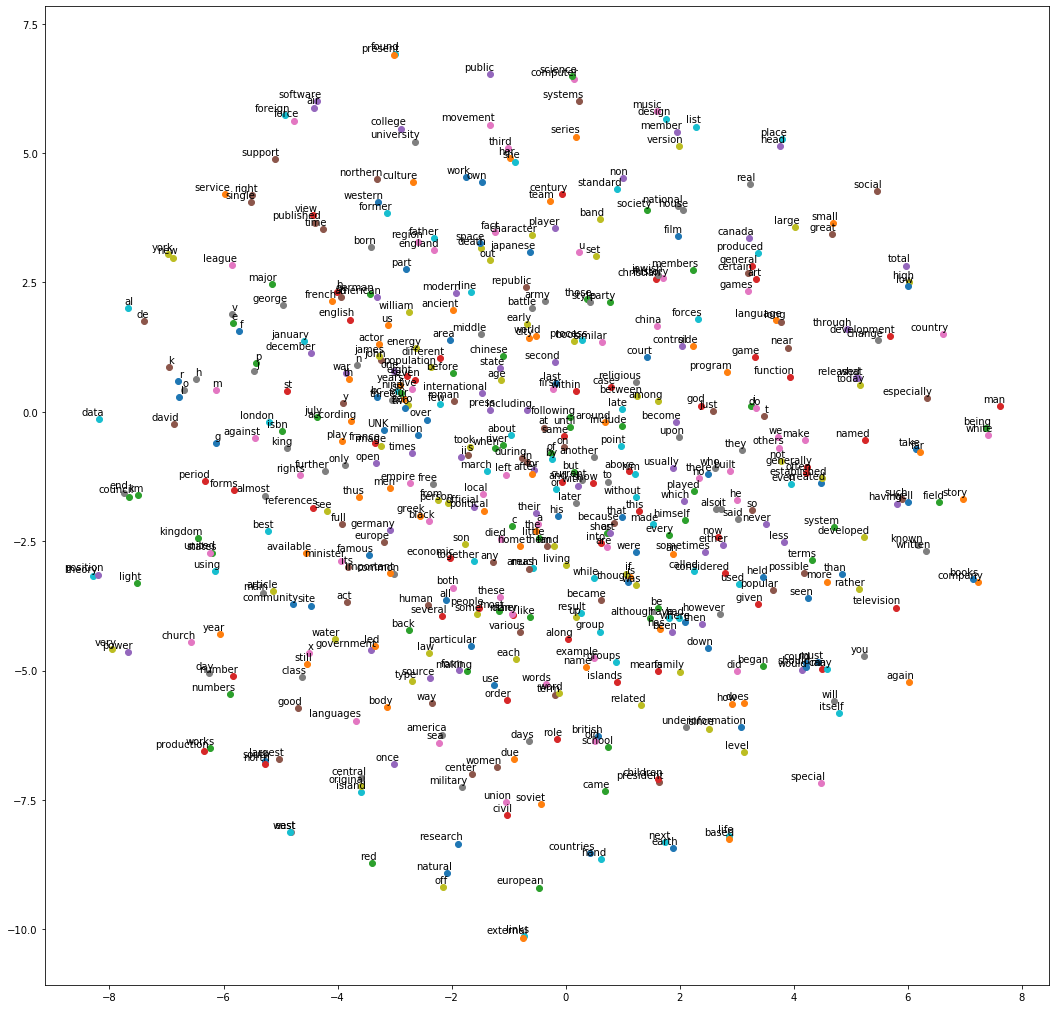

In [126]:
from sklearn.manifold import TSNE

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
plot_only = 500
low_dim_embs = tsne.fit_transform(final_embeddings[:plot_only,:])
labels = [vocabulary[i] for i in range(plot_only)]
plot_with_labels(low_dim_embs, labels)

## Machine translation

In [128]:
import tensorflow as tf
tf.reset_dfeau

n_steps = 50
n_neurons = 200
n_layers = 3
num_encoder_symbols = 20000
num_decoder_symbols = 20000
embedding_size = 150
learning_rate = 0.01

X = tf.placeholder(tf.int32, [None, n_steps]) # English sentences
Y = tf.placeholder(tf.int32, [None, n_steps]) # French translations
W = tf.placeholder(tf.float32, [None, n_steps - 1, 1])
Y_input = Y[:, :-1]
Y_target = Y[:, 1:]

encoder_inputs = tf.unstack(tf.transpose(X)) # list of 1D tensors
decoder_inputs = tf.unstack(tf.transpose(Y_input)) # list of 1D tensors

lstm_cells = [tf.nn.rnn_cell.BasicLSTMCell(num_units=n_neurons)
              for layer in range(n_layers)]
cell = tf.nn.rnn_cell.MultiRNNCell(lstm_cells)

output_seqs, states = tf.contrib.legacy_seq2seq.embedding_rnn_seq2seq(
    encoder_inputs,
    decoder_inputs,
    cell,
    num_encoder_symbols,
    num_decoder_symbols,
    embedding_size)

logits = tf.transpose(tf.unstack(output_seqs), perm=[1, 0, 2])

NameError: name 'reset_graph' is not defined

In [ ]:
logits_flat = tf.reshape(logits, [-1, num_decoder_symbols])
Y_target_flat = tf.reshape(Y_target,[-1])
W_flat = tf.reshape(W, [-1])
xentropy = W_flat * tf.nn.sparse_softmax_cross_entropy_with_logits(labels=Y_target_flat, logits=logits_flat)
loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variable_initialier()